## **Analisis Hubungan Mobilitas pada Positivity Rate Harian Indonesia**

## **Problem** Statement

Pada tahun 2022, pandemi COVID-19 sudah mulai mereda. Banyak orang berkegiatan dengan normal, layaknya virus ini sudah tidak ada. Namun, aktivitas dan mobilitas masyarakat, khususnya di wilayah Indonesia, masih tetap bergantung pada angka COVID-19 mengingat masih terdapat kebijakan yang harus dipatuhi untuk mencegah peningkatan virus.

$\hspace{0.1cm}$

Oleh karena itu, akan dilihat **faktor-faktor mobilitas apa saja yang dipengaruhi kuat oleh peningkatan COVID-19** sehingga dapat diketahui bidang mana saja yang mampu berjalan normal seiring penurunan COVID-19.

$\hspace{0.1cm}$

Disini, Tim Circuit menggunakan data

1. ***Daily Update Agregat*** di Indonesia

2. ***Mobility Report*** pada tahun 2021-2022

3. ***Positivity Rate Harian*** di Indonesia

4. ***Vaksinasi Dosis 1 dan 2*** di Indonesia

Kemudian, akan dibuat model **Regresi Multivariat** untuk meneliti hubungan antar dua atau lebih variabel.

## Data **Cleaning** and **Preprocessing**

In [1]:
import pandas as pd

### Dataset **Agregat COVID-19** (*Daily Update Agregat*)

In [2]:
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns',None)
jktindo = pd.read_csv('jktandindoc19.csv')
jktindo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,29/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/03/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,02/03/2020,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0
3,03/03/2020,2,2,0,0,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
4,04/03/2020,2,2,0,0,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0


Mengidentifikasi **informasi tiap kolom** data agregat

In [3]:
jktindo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Tanggal                          842 non-null    object
 1   Positif (Indonesia)              842 non-null    int64 
 2   Dirawat (Indonesia)              842 non-null    int64 
 3   Sembuh (Indonesia)               842 non-null    int64 
 4   Meninggal (Indonesia)            842 non-null    int64 
 5   Meninggal (Jakarta)              842 non-null    int64 
 6   Sembuh (Jakarta)                 842 non-null    int64 
 7   Self-Isolation (Jakarta)         842 non-null    int64 
 8   Dirawat (Jakarta)                842 non-null    int64 
 9   Positif (Jakarta)                842 non-null    int64 
 10  Positif Aktif (Jakarta)          842 non-null    int64 
 11  Positif Harian (Indonesia)       842 non-null    int64 
 12  Dirawat Harian (Indonesia)       842

Terlihat bahwa **kolom 'tanggal'** merupakan kolom berisikan tanggal yang seharusnya bertipe ***'datetime'***. Akan dilakukan *converting* type data mengikuti format tanggal umum pada python.

In [4]:
jktindo['Tanggal'] = pd.to_datetime(jktindo['Tanggal'], dayfirst=True)
jktindo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0
3,2020-03-03,2,2,0,0,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
4,2020-03-04,2,2,0,0,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0


Akan dilakukan **penurunan (*drop*) kolom** data agregat Jakarta karena yang ingin kami ambil adalah data keseluruhan Indonesia.

In [5]:
AgregIndo = jktindo.drop(columns = ['Meninggal (Jakarta)',
       'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)', 'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)'])
AgregIndo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
0,2020-01-29,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0
2,2020-03-02,2,2,0,0,2,2,0,0
3,2020-03-03,2,2,0,0,0,0,0,0
4,2020-03-04,2,2,0,0,0,0,0,0


Mengidentifikasi **informasi tiap kolom** data agregat Indonesia

In [6]:
AgregIndo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Tanggal                       842 non-null    datetime64[ns]
 1   Positif (Indonesia)           842 non-null    int64         
 2   Dirawat (Indonesia)           842 non-null    int64         
 3   Sembuh (Indonesia)            842 non-null    int64         
 4   Meninggal (Indonesia)         842 non-null    int64         
 5   Positif Harian (Indonesia)    842 non-null    int64         
 6   Dirawat Harian (Indonesia)    842 non-null    int64         
 7   Sembuh Harian (Indonesia)     842 non-null    int64         
 8   Meninggal Harian (Indonesia)  842 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 59.3 KB


Melihat informasi data agregat Indonesia secara **statistik**

In [7]:
AgregIndo.describe()

,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
count,8.420000e+02,842.000000,8.420000e+02,842.000000,842.000000,842.000000,842.000000,842.000000
mean,2.357720e+06,103288.384798,2.184895e+06,69536.339667,7206.739905,10.206651,7010.444181,186.089074
std,2.152014e+06,133755.991892,2.064793e+06,62261.528965,11518.683915,6682.451624,10595.876017,324.630653
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-29938.000000,0.000000,0.000000
25%,2.723075e+05,11701.500000,2.003058e+05,10327.500000,609.500000,-771.500000,526.500000,22.250000
50%,1.638993e+06,59910.000000,1.494224e+06,44547.000000,3446.000000,64.000000,3571.500000,90.500000
75%,4.253334e+06,124431.750000,4.101464e+06,143736.250000,6820.750000,589.750000,7341.000000,183.750000
max,6.068075e+06,586113.000000,5.902794e+06,156687.000000,64718.000000,39165.000000,61361.000000,2069.000000


Memerika **data hilang (*null*)** pada dataset agregat Indonesia

In [8]:
AgregIndo.isna().sum()

Tanggal                         0
Positif (Indonesia)             0
Dirawat (Indonesia)             0
Sembuh (Indonesia)              0
Meninggal (Indonesia)           0
Positif Harian (Indonesia)      0
Dirawat Harian (Indonesia)      0
Sembuh Harian (Indonesia)       0
Meninggal Harian (Indonesia)    0
dtype: int64

Memerika **data duplikat** pada dataset mobilitas

In [9]:
AgregIndo.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka dataset agregat Indonesia **siap digunakan**.

Selanjutnya, akan ditambahkan kolom **Tahun** untuk memudahkan pemilihan periode tanggal yang akan digunakan.

In [10]:
AgregIndo['Tahun'] = AgregIndo['Tanggal'].dt.year
AgregIndo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Tahun
0,2020-01-29,0,0,0,0,0,0,0,0,2020
1,2020-03-01,0,0,0,0,0,0,0,0,2020
2,2020-03-02,2,2,0,0,2,2,0,0,2020
3,2020-03-03,2,2,0,0,0,0,0,0,2020
4,2020-03-04,2,2,0,0,0,0,0,0,2020


Dipilih data Agregat Indonesia dengan rentang **Tahun 2021 - 2022**.

In [11]:
AgregIndo2122 = AgregIndo.query('Tahun == [2021, 2022]')

#melakukan pengecekan ulang 5 data pertama merupakan data tahun 2021
AgregIndo2122.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Tahun
307,2021-01-01,751270,111005,617936,22329,8072,1042,6839,191,2021
308,2021-01-02,758473,110400,625518,22555,7203,-605,7582,226,2021
309,2021-01-03,765350,110679,631937,22734,6877,279,6419,179,2021
310,2021-01-04,772103,110089,639103,22911,6753,-590,7166,177,2021
311,2021-01-05,779548,110693,645746,23109,7445,604,6643,198,2021


In [12]:
#melakukan pengecekan ulang 5 data pertama merupakan data tahun 2022
AgregIndo2122.tail()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Tahun
837,2022-06-15,6063251,6007,5900574,156670,1242,709,525,8,2022
838,2022-06-16,6064424,6668,5901083,156673,1173,661,509,3,2022
839,2022-06-17,6065644,7326,5901639,156679,1220,658,556,6,2022
840,2022-06-18,6066908,8062,5902162,156684,1264,736,523,5,2022
841,2022-06-19,6068075,8594,5902794,156687,1167,532,632,3,2022


### Dataset **Mobilitas** (*Mobility Report*)

In [13]:
mob2021 = pd.read_csv('2021_ID_Region_Mobility_Report.csv')
mob2021.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-01,-25,-8,18,-42.0,-66,19
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-02,-20,3,0,-27.0,-32,11
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-03,-21,-2,-6,-22.0,-9,9
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-04,-15,5,-5,-26.0,-24,11
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-05,-18,3,-10,-27.0,-25,12


In [14]:
mob2022 = pd.read_csv('2022_ID_Region_Mobility_Report.csv')
mob2022.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-01,3,24,46,-15,-49,6
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-02,11,35,28,-4,-4,3
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-03,14,36,20,-9,-10,4
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-04,11,33,15,-9,-8,4
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-05,12,34,17,-10,-7,4


Akan dilakukan **penggabungan data** mobilitas tahun 2021 dan 2022

In [15]:
mobility = pd.concat([mob2021, mob2022])
mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-01,-25,-8,18,-42.0,-66,19
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-02,-20,3,0,-27.0,-32,11
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-03,-21,-2,-6,-22.0,-9,9
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-04,-15,5,-5,-26.0,-24,11
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2021-01-05,-18,3,-10,-27.0,-25,12


Melihat informasi data mobilitas secara **statistik**

In [16]:
mobility.describe()

,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,0.0,0.0,12943.000000,12943.000000,12943.000000,12668.000000,12943.000000,12943.000000
mean,NaN,NaN,NaN,-4.128332,20.373716,-5.040562,-21.277076,-20.340493,2.543151
std,NaN,NaN,NaN,16.450644,21.160953,22.197105,21.986650,13.461652,6.118932
min,NaN,NaN,NaN,-92.000000,-93.000000,-87.000000,-98.000000,-85.000000,-18.000000
25%,NaN,NaN,NaN,-16.000000,5.000000,-19.000000,-35.000000,-27.000000,-2.000000
50%,NaN,NaN,NaN,-5.000000,21.000000,-6.000000,-23.000000,-20.000000,2.000000
75%,NaN,NaN,NaN,7.000000,33.000000,8.000000,-8.000000,-12.000000,7.000000
max,NaN,NaN,NaN,69.000000,155.000000,214.000000,61.000000,29.000000,36.000000


Mengidentifikasi **informasi tiap kolom** data mobilitas

In [17]:
mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12943 entries, 0 to 167
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 12943 non-null  object 
 1   country_region                                      12943 non-null  object 
 2   sub_region_1                                        12410 non-null  object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     12410 non-null  object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            12943 non-null  object 
 8   date                                                12943 non-null  object 
 9

Selanjutnya, akan dilakukan pengambilan data yang berisi **null** pada kolom **sub_region_1** karena yang akan diambil adalah data **seluruh Indonesia**

In [18]:
mobility = mobility[mobility['sub_region_1'].isna()]

Terlihat bahwa **kolom 'date'** merupakan kolom berisikan tanggal yang seharusnya bertipe ***'datetime'***. Akan dilakukan *converting* type data.

In [19]:
mobility['date'] = mobility['date'].astype('datetime64')

Akan dilakukan **penurunan** (*drop*) beberapa kolom yang dirasa tidak akan digunakan seperti kolom yang berisikan **id** atau **kode**, yaitu sebagai berikut.
1. 'country_region_code'
2. 'country_region'
3. 'sub_region_1'
4. 'sub_region_2'
5. 'metro_area'
6. 'iso_3166_2_code'
7. 'cencus_fips_code'
8. 'place_id'

In [20]:
mobility = mobility.drop(columns = ['country_region_code', 'country_region', 
                                    'sub_region_1','sub_region_2',
                                    'metro_area', 'iso_3166_2_code', 'census_fips_code',
                                    'place_id'] )
mobility.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,-25,-8,18,-42.0,-66,19
1,2021-01-02,-20,3,0,-27.0,-32,11
2,2021-01-03,-21,-2,-6,-22.0,-9,9
3,2021-01-04,-15,5,-5,-26.0,-24,11
4,2021-01-05,-18,3,-10,-27.0,-25,12


Dilakukan **pengecekan kembali** dataset mobilitas.

In [21]:
mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 167
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                533 non-null    datetime64[ns]
 1   retail_and_recreation_percent_change_from_baseline  533 non-null    int64         
 2   grocery_and_pharmacy_percent_change_from_baseline   533 non-null    int64         
 3   parks_percent_change_from_baseline                  533 non-null    int64         
 4   transit_stations_percent_change_from_baseline       533 non-null    float64       
 5   workplaces_percent_change_from_baseline             533 non-null    int64         
 6   residential_percent_change_from_baseline            533 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 33.3 KB


Memeriksa **data hilang (*null*)** pada dataset mobilitas

In [22]:
mobility.isna().sum()

date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

Memerika **data duplikat** pada dataset mobilitas

In [23]:
mobility.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka dataset mobilitas **siap digunakan**.

Kemudian akan dilakukan **penggabungan** dataset AgregIndo2122 (agregat) dengan dataset mobilitas.

In [24]:
AgregMobIndo = pd.merge_ordered(AgregIndo2122, mobility, left_on = 'Tanggal', right_on = 'date', how = 'left')
AgregMobIndo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Tahun,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,751270,111005,617936,22329,8072,1042,6839,191,2021,2021-01-01,-25.0,-8.0,18.0,-42.0,-66.0,19.0
1,2021-01-02,758473,110400,625518,22555,7203,-605,7582,226,2021,2021-01-02,-20.0,3.0,0.0,-27.0,-32.0,11.0
2,2021-01-03,765350,110679,631937,22734,6877,279,6419,179,2021,2021-01-03,-21.0,-2.0,-6.0,-22.0,-9.0,9.0
3,2021-01-04,772103,110089,639103,22911,6753,-590,7166,177,2021,2021-01-04,-15.0,5.0,-5.0,-26.0,-24.0,11.0
4,2021-01-05,779548,110693,645746,23109,7445,604,6643,198,2021,2021-01-05,-18.0,3.0,-10.0,-27.0,-25.0,12.0


Akan dilakukan **penurunan** (*drop*) beberapa kolom yang tidak akan digunakan yaitu:
1. 'Tahun'
2. 'date'

In [25]:
AgregMobIndo = AgregMobIndo.drop(columns = ['Tahun', 'date'])
AgregMobIndo.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,751270,111005,617936,22329,8072,1042,6839,191,-25.0,-8.0,18.0,-42.0,-66.0,19.0
1,2021-01-02,758473,110400,625518,22555,7203,-605,7582,226,-20.0,3.0,0.0,-27.0,-32.0,11.0
2,2021-01-03,765350,110679,631937,22734,6877,279,6419,179,-21.0,-2.0,-6.0,-22.0,-9.0,9.0
3,2021-01-04,772103,110089,639103,22911,6753,-590,7166,177,-15.0,5.0,-5.0,-26.0,-24.0,11.0
4,2021-01-05,779548,110693,645746,23109,7445,604,6643,198,-18.0,3.0,-10.0,-27.0,-25.0,12.0


Memeriksa **data hilang (*null*)** pada dataset agregat-mobilitas (AgregMobIndo)

**Data null terdeteksi**. Melakukan deteksi kolom yang memiliki data null.

In [27]:
AgregMobIndoNaN = AgregMobIndo.query('retail_and_recreation_percent_change_from_baseline.isnull()', engine = 'python')
AgregMobIndoNaN

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
533,2022-06-18,6066908,8062,5902162,156684,1264,736,523,5,NaN,NaN,NaN,NaN,NaN,NaN
534,2022-06-19,6068075,8594,5902794,156687,1167,532,632,3,NaN,NaN,NaN,NaN,NaN,NaN


Melakukan **drop terhadap baris 533 dan 534** karena mengandung data null.

In [28]:
Indonesia = AgregMobIndo.drop([533, 534])

Memeriksa kembali **data hilang (*null*)** pada dataset AgregMobIndo.

In [29]:
Indonesia.isna().sum()

Tanggal                                               0
Positif (Indonesia)                                   0
Dirawat (Indonesia)                                   0
Sembuh (Indonesia)                                    0
Meninggal (Indonesia)                                 0
Positif Harian (Indonesia)                            0
Dirawat Harian (Indonesia)                            0
Sembuh Harian (Indonesia)                             0
Meninggal Harian (Indonesia)                          0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

Memeriksa **data duplikat** pada dataset agregat-mobilitas yang telah dibersihkan dari null sebelumnya.

In [30]:
Indonesia.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka dataset Indonesia **siap digunakan**.

Dataset yang dihasilkan dari data prepocessing ini adalah **dataset Indonesia** yaitu **dataset yang berisikan data daily update agregat COVID-19 Indonesia dengan dataset mobilitas di Indonesia pada tahun 2021-2022.**

### Dataset ***Positivity Rate*** COVID-19 Indonesia 2021-2022

In [31]:
PosRate = pd.read_excel('Positivity Rate Januari 2021-17 Juni 2022(2).xlsx')
PosRate['Positivity Rate Harian (Indonesia)'] = PosRate['Positivity_Rate_Harian']
PosRate = PosRate.drop(columns = 'Positivity_Rate_Harian')
PosRate.head()

,Tanggal,Positivity Rate Harian (Indonesia)
0,2021-01-01,29.5
1,2021-01-02,29.5
2,2021-01-03,24.8
3,2021-01-04,22.0
4,2021-01-05,19.4


Mengidentifikasi **informasi tiap kolom** data positivity rate

In [32]:
PosRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             533 non-null    datetime64[ns]
 1   Positivity Rate Harian (Indonesia)  530 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.5 KB


Melakukan penggabungan **dataset Indonesia** dengan **dataset positivity rate** berdasarkan tanggal

Terbentuk **dataset df** yang berisikan penggabungan antar **data agregat Indonesia, data mobilitas Indonesia, dan data positivity rate Indonesia**.

In [33]:
df = Indonesia.merge(PosRate, on = 'Tanggal', how = 'inner').fillna(method='ffill')
df.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Positivity Rate Harian (Indonesia)
0,2021-01-01,751270,111005,617936,22329,8072,1042,6839,191,-25.0,-8.0,18.0,-42.0,-66.0,19.0,29.5
1,2021-01-02,758473,110400,625518,22555,7203,-605,7582,226,-20.0,3.0,0.0,-27.0,-32.0,11.0,29.5
2,2021-01-03,765350,110679,631937,22734,6877,279,6419,179,-21.0,-2.0,-6.0,-22.0,-9.0,9.0,24.8
3,2021-01-04,772103,110089,639103,22911,6753,-590,7166,177,-15.0,5.0,-5.0,-26.0,-24.0,11.0,22.0
4,2021-01-05,779548,110693,645746,23109,7445,604,6643,198,-18.0,3.0,-10.0,-27.0,-25.0,12.0,19.4


Mengidentifikasi **informasi tiap kolom** dataset df

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Tanggal                                             533 non-null    datetime64[ns]
 1   Positif (Indonesia)                                 533 non-null    int64         
 2   Dirawat (Indonesia)                                 533 non-null    int64         
 3   Sembuh (Indonesia)                                  533 non-null    int64         
 4   Meninggal (Indonesia)                               533 non-null    int64         
 5   Positif Harian (Indonesia)                          533 non-null    int64         
 6   Dirawat Harian (Indonesia)                          533 non-null    int64         
 7   Sembuh Harian (Indonesia)                           533 non-null    int64         
 8   Meninggal 

Memerika **data hilang (*null*)** pada dataset df

In [35]:
df.isna().sum()

Tanggal                                               0
Positif (Indonesia)                                   0
Dirawat (Indonesia)                                   0
Sembuh (Indonesia)                                    0
Meninggal (Indonesia)                                 0
Positif Harian (Indonesia)                            0
Dirawat Harian (Indonesia)                            0
Sembuh Harian (Indonesia)                             0
Meninggal Harian (Indonesia)                          0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
Positivity Rate Harian (Indonesia)                    0
dtype: int64

Memerika **data duplikat** pada dataset df

In [36]:
df.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka **dataset df** (gabungan agregat, mobilitas, dan positivity rate)  **siap digunakan**.

### Dataset **Vaksinasi** Total Indonesia Dosis 1 dan Dosis 2 2021-2022

In [37]:
vaksin = pd.read_excel('Vaksinasi Total Indonesia(1).xlsx')
vaksin.head()

,Tanggal,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2
0,2021-03-05,2413615,1114537,5.981838,2.762238
1,2021-03-06,2552265,1130524,6.325465,2.801860
2,2021-03-07,2888757,1133787,7.159417,2.809947
3,2021-03-08,3098025,1158432,7.678062,2.871027
4,2021-03-09,3337026,1197772,8.270395,2.968526


Mengidentifikasi **informasi tiap kolom** data vaksin total Indonesia

In [38]:
vaksin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       472 non-null    datetime64[ns]
 1   Vaksinasi 1   472 non-null    int64         
 2   Vaksinasi 2   472 non-null    int64         
 3   Persentase 1  472 non-null    float64       
 4   Persentase 2  472 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 18.6 KB


Hanya akan diambil **data Persentase Vaksinasi 2** karena merupakan data yang menurut kami paling relevan dan paling berdampak terhadap kerentanan masyarakat terhadap COVID-19.

In [39]:
vaksin = vaksin.drop(columns = ['Vaksinasi 1', 'Vaksinasi 2', 'Persentase 1'])
vaksin.head()

,Tanggal,Persentase 2
0,2021-03-05,2.762238
1,2021-03-06,2.801860
2,2021-03-07,2.809947
3,2021-03-08,2.871027
4,2021-03-09,2.968526


Memerika **data hilang (*null*)** pada dataset vaksin Indonesia

In [40]:
vaksin.isna().sum()

Tanggal         0
Persentase 2    0
dtype: int64

Memerika **data duplikat** pada dataset vaksin Indonesia

In [41]:
vaksin.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka dataset Vaksin **siap digunakan**.

Akan dilakukan **penggabungan (*merge*)** dataset antara **dataset df** (agregat, mobility, positivity rate) dengan **dataset vaksin** berdasarkan tanggal.

In [42]:
covid19_df = vaksin.merge(df, on = 'Tanggal', how = 'left')
covid19_df.head()

,Tanggal,Persentase 2,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Positivity Rate Harian (Indonesia)
0,2021-03-05,2.762238,1368093.0,148380.0,1182687.0,37026.0,6995.0,535.0,6331.0,129.0,-17.0,1.0,-22.0,-33.0,-26.0,6.0,32.7
1,2021-03-06,2.801860,1373836.0,147172.0,1189510.0,37154.0,5743.0,-1208.0,6823.0,128.0,-18.0,2.0,-24.0,-28.0,-20.0,4.0,16.5
2,2021-03-07,2.809947,1379662.0,147740.0,1194656.0,37266.0,5826.0,568.0,5146.0,112.0,-20.0,-1.0,-20.0,-31.0,-15.0,5.0,19.5
3,2021-03-08,2.871027,1386556.0,145628.0,1203381.0,37547.0,6894.0,-2112.0,8725.0,281.0,-18.0,0.0,-21.0,-33.0,-27.0,6.0,18.2
4,2021-03-09,2.968526,1392945.0,144311.0,1210877.0,37757.0,6389.0,-1317.0,7496.0,210.0,-17.0,1.0,-20.0,-31.0,-28.0,6.0,14.5


In [43]:
covid19_df.tail()

,Tanggal,Persentase 2,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Positivity Rate Harian (Indonesia)
467,2022-06-15,80.754501,6063251.0,6007.0,5900574.0,156670.0,1242.0,709.0,525.0,8.0,12.0,31.0,52.0,-9.0,7.0,15.0,2.15
468,2022-06-16,80.787081,6064424.0,6668.0,5901083.0,156673.0,1173.0,661.0,509.0,3.0,12.0,31.0,48.0,-9.0,8.0,15.0,2.13
469,2022-06-17,80.847931,6065644.0,7326.0,5901639.0,156679.0,1220.0,658.0,556.0,6.0,8.0,26.0,37.0,-11.0,9.0,16.0,2.31
470,2022-06-18,80.872200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,2022-06-19,80.881164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Memerika **data hilang (*null*)** pada dataset covid19_df

In [44]:
covid19_df.isna().sum()

Tanggal                                               0
Persentase 2                                          0
Positif (Indonesia)                                   2
Dirawat (Indonesia)                                   2
Sembuh (Indonesia)                                    2
Meninggal (Indonesia)                                 2
Positif Harian (Indonesia)                            2
Dirawat Harian (Indonesia)                            2
Sembuh Harian (Indonesia)                             2
Meninggal Harian (Indonesia)                          2
retail_and_recreation_percent_change_from_baseline    2
grocery_and_pharmacy_percent_change_from_baseline     2
parks_percent_change_from_baseline                    2
transit_stations_percent_change_from_baseline         2
workplaces_percent_change_from_baseline               2
residential_percent_change_from_baseline              2
Positivity Rate Harian (Indonesia)                    2
dtype: int64

**Terdeteksi data null**, akan dicari baris yang mengandung data null dan dilakukan drop baris.

In [45]:
covid19_dfNaN = covid19_df.query('retail_and_recreation_percent_change_from_baseline.isnull()', engine = 'python')
covid19_dfNaN

,Tanggal,Persentase 2,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Positivity Rate Harian (Indonesia)
470,2022-06-18,80.872200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,2022-06-19,80.881164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
covid19_df = covid19_df.drop([470, 471])
covid19_df.isna().sum()

Tanggal                                               0
Persentase 2                                          0
Positif (Indonesia)                                   0
Dirawat (Indonesia)                                   0
Sembuh (Indonesia)                                    0
Meninggal (Indonesia)                                 0
Positif Harian (Indonesia)                            0
Dirawat Harian (Indonesia)                            0
Sembuh Harian (Indonesia)                             0
Meninggal Harian (Indonesia)                          0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
Positivity Rate Harian (Indonesia)                    0
dtype: int64

Memerika **data duplikat** pada dataset covid19_df

In [47]:
covid19_df.duplicated().sum()

0

Karena tidak ada data hilang maupun data duplikat, maka dataset covid19_df (telah memuat semua dataset) **siap digunakan**.

Dataset akhir hasil data processing yang akan digunakan pada pengolahan data ini adalah **dataset COVID19_df** yang berisikan penggabungan antar **data agregat Indonesia, data mobilitas Indonesia, data positivity rate Indonesia, dan data persentase vaksin dosis 2 Indonesia** pada rentang tahun 2021-2022.

## **Exploratory Data Analysis** (Visualisasi Data)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

Akan dilakukan **visualisasi data mobilitas dan positivity rate berdasarkan tanggal**.

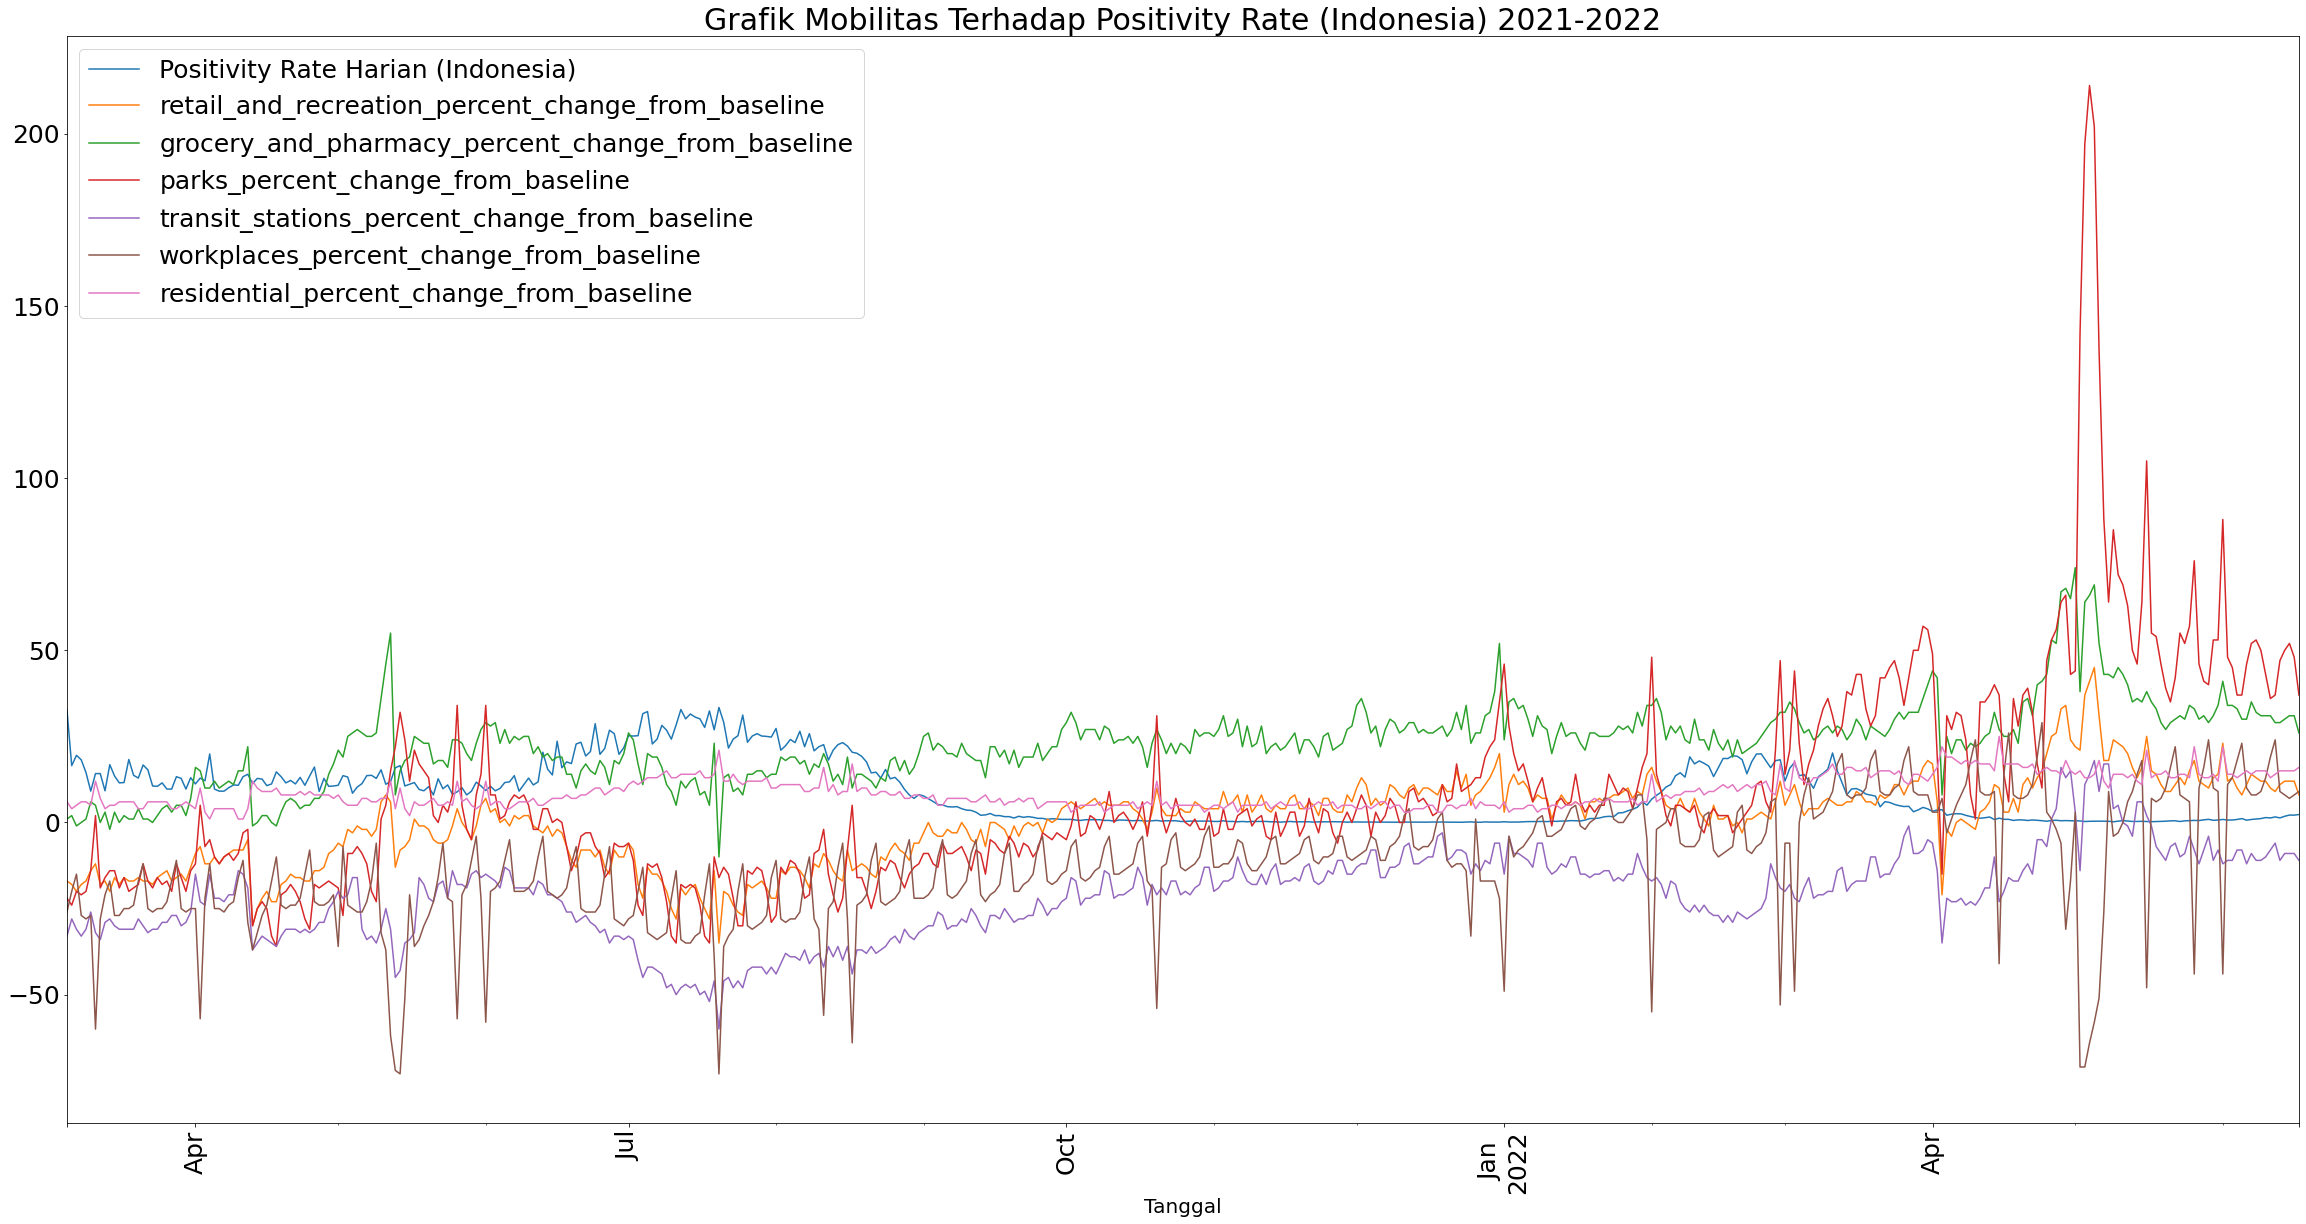

In [49]:
# Mobilitas terhadap Positivity Rate.
covid19_df.plot(x = 'Tanggal', y = ['Positivity Rate Harian (Indonesia)', 'retail_and_recreation_percent_change_from_baseline', 
                            'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                            'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline', 
                            'residential_percent_change_from_baseline'],
             kind = 'line' , figsize = (40,20), fontsize = 25, rot = 90)
plt.legend(fontsize = 25)
plt.title('Grafik Mobilitas Terhadap Positivity Rate (Indonesia) 2021-2022', fontsize = 30)
plt.xlabel('Tanggal', fontsize = 20)
plt.show()

Untuk visualisasi yang lebih jelas, akan dilakukan plotting graph **tiap mobilitas dengan positivity rate berdasarkan tanggal**.

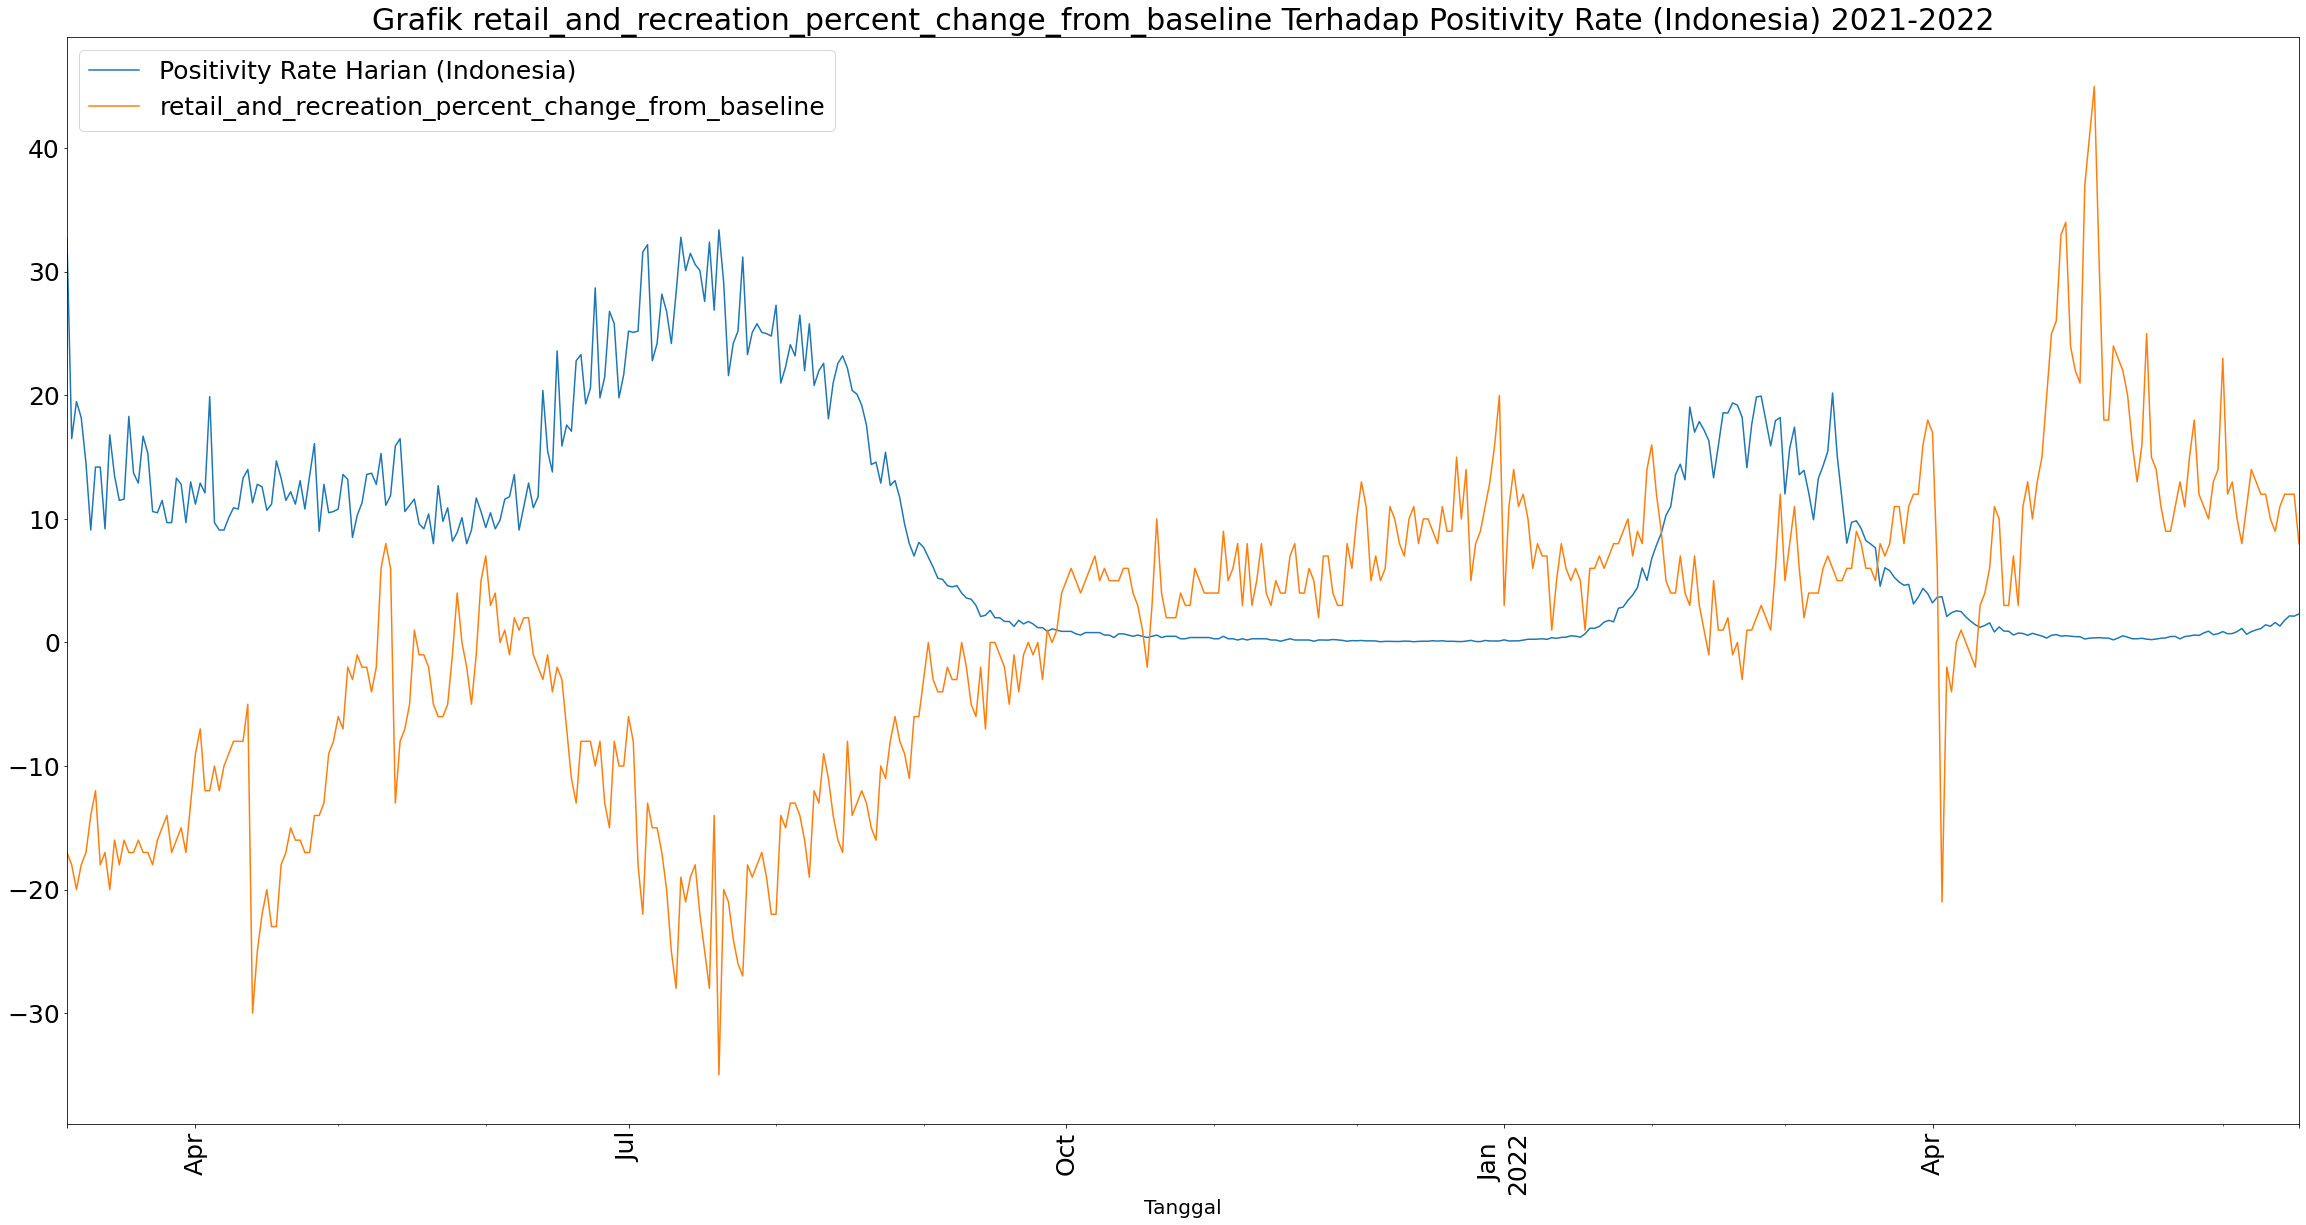

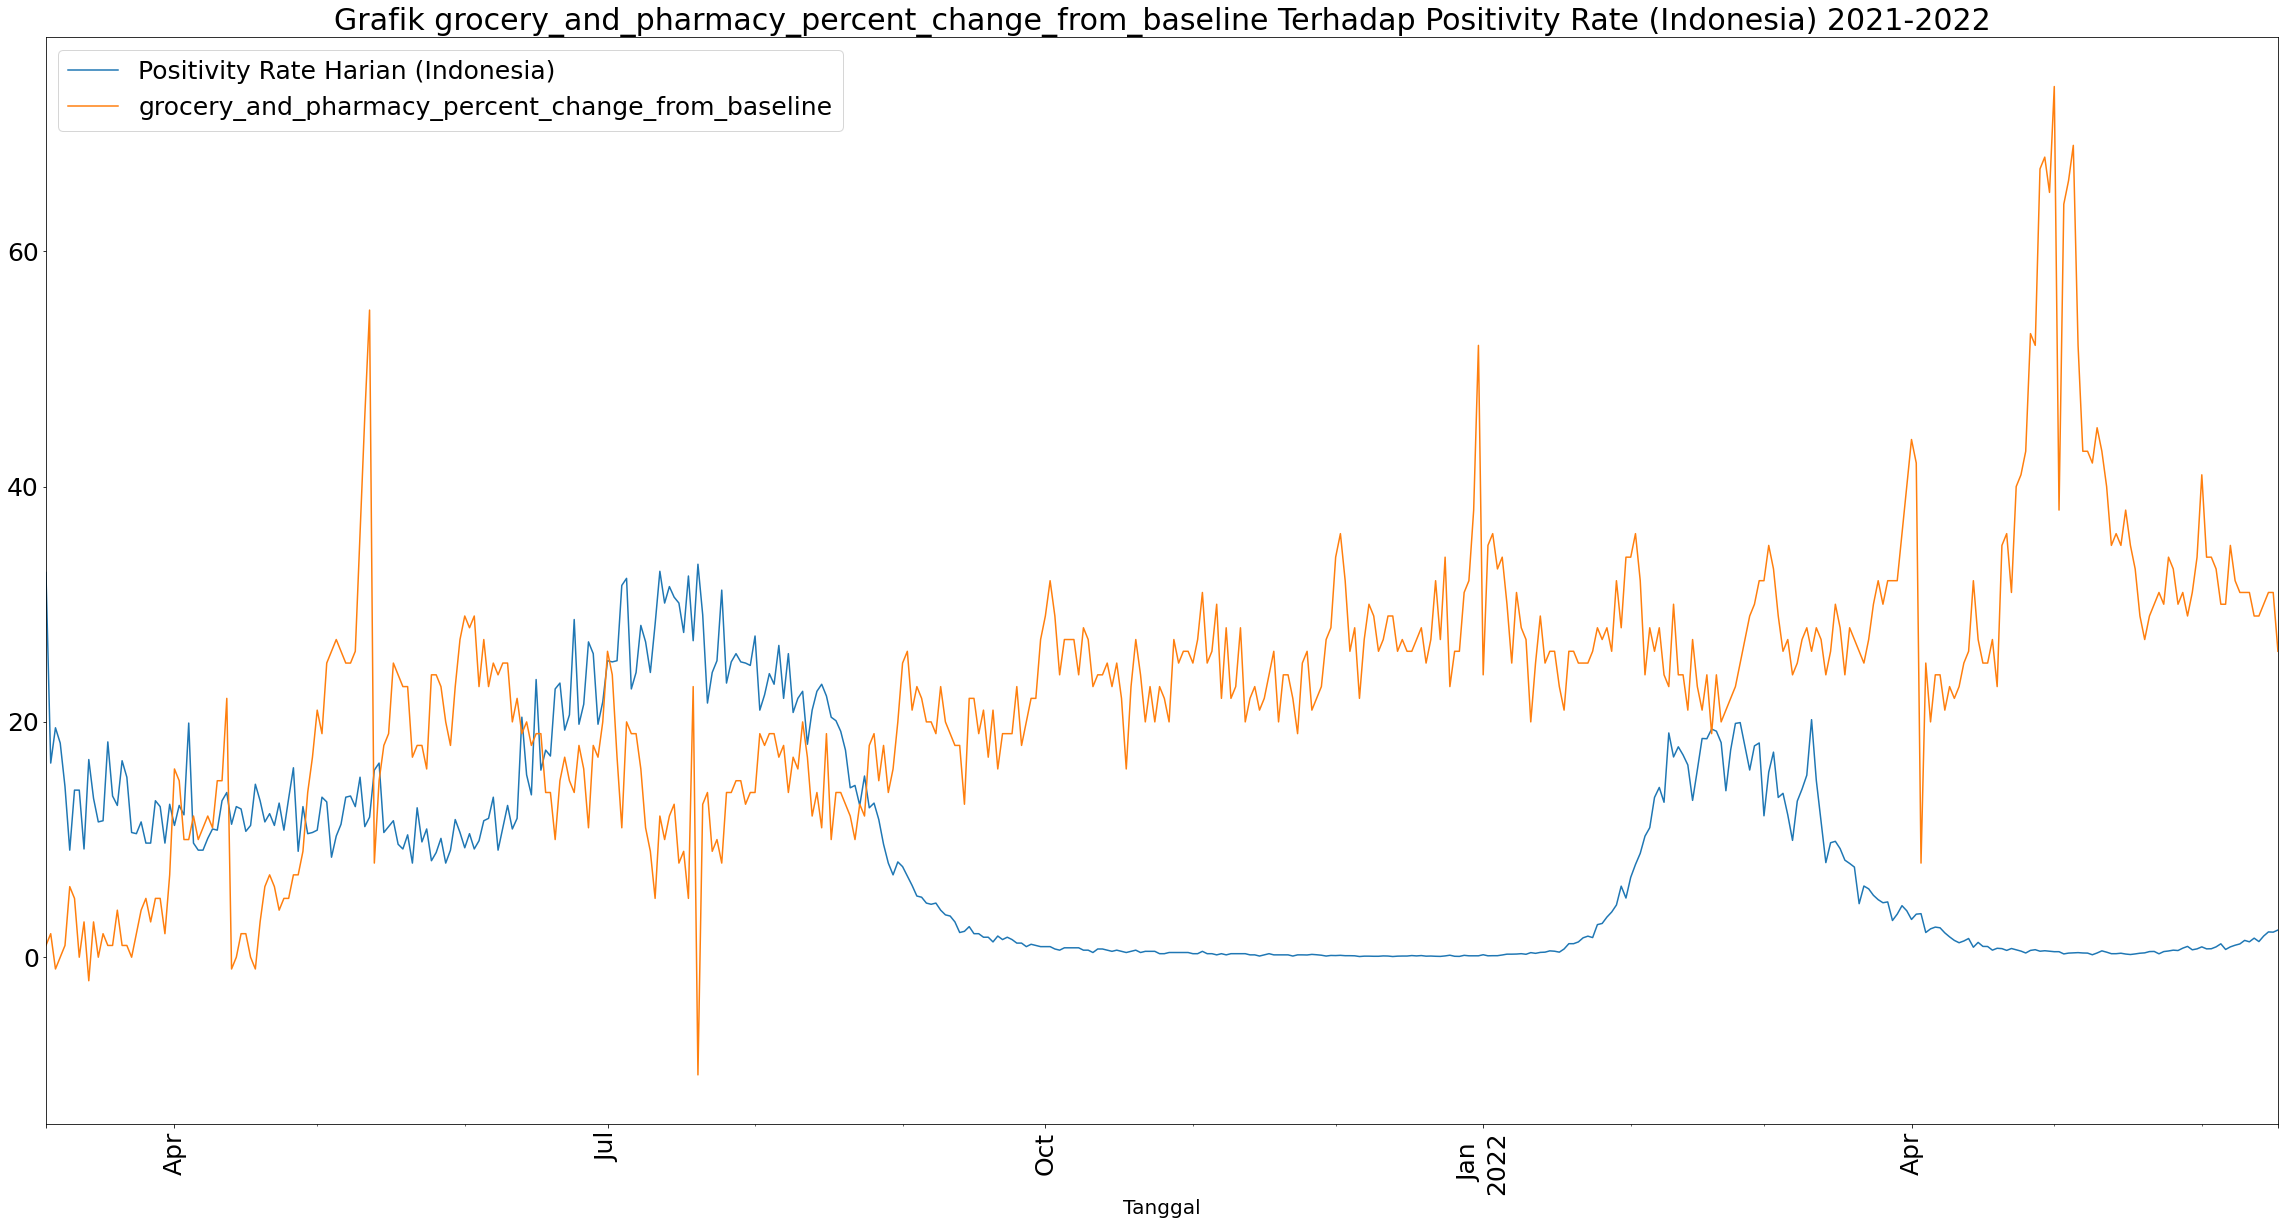

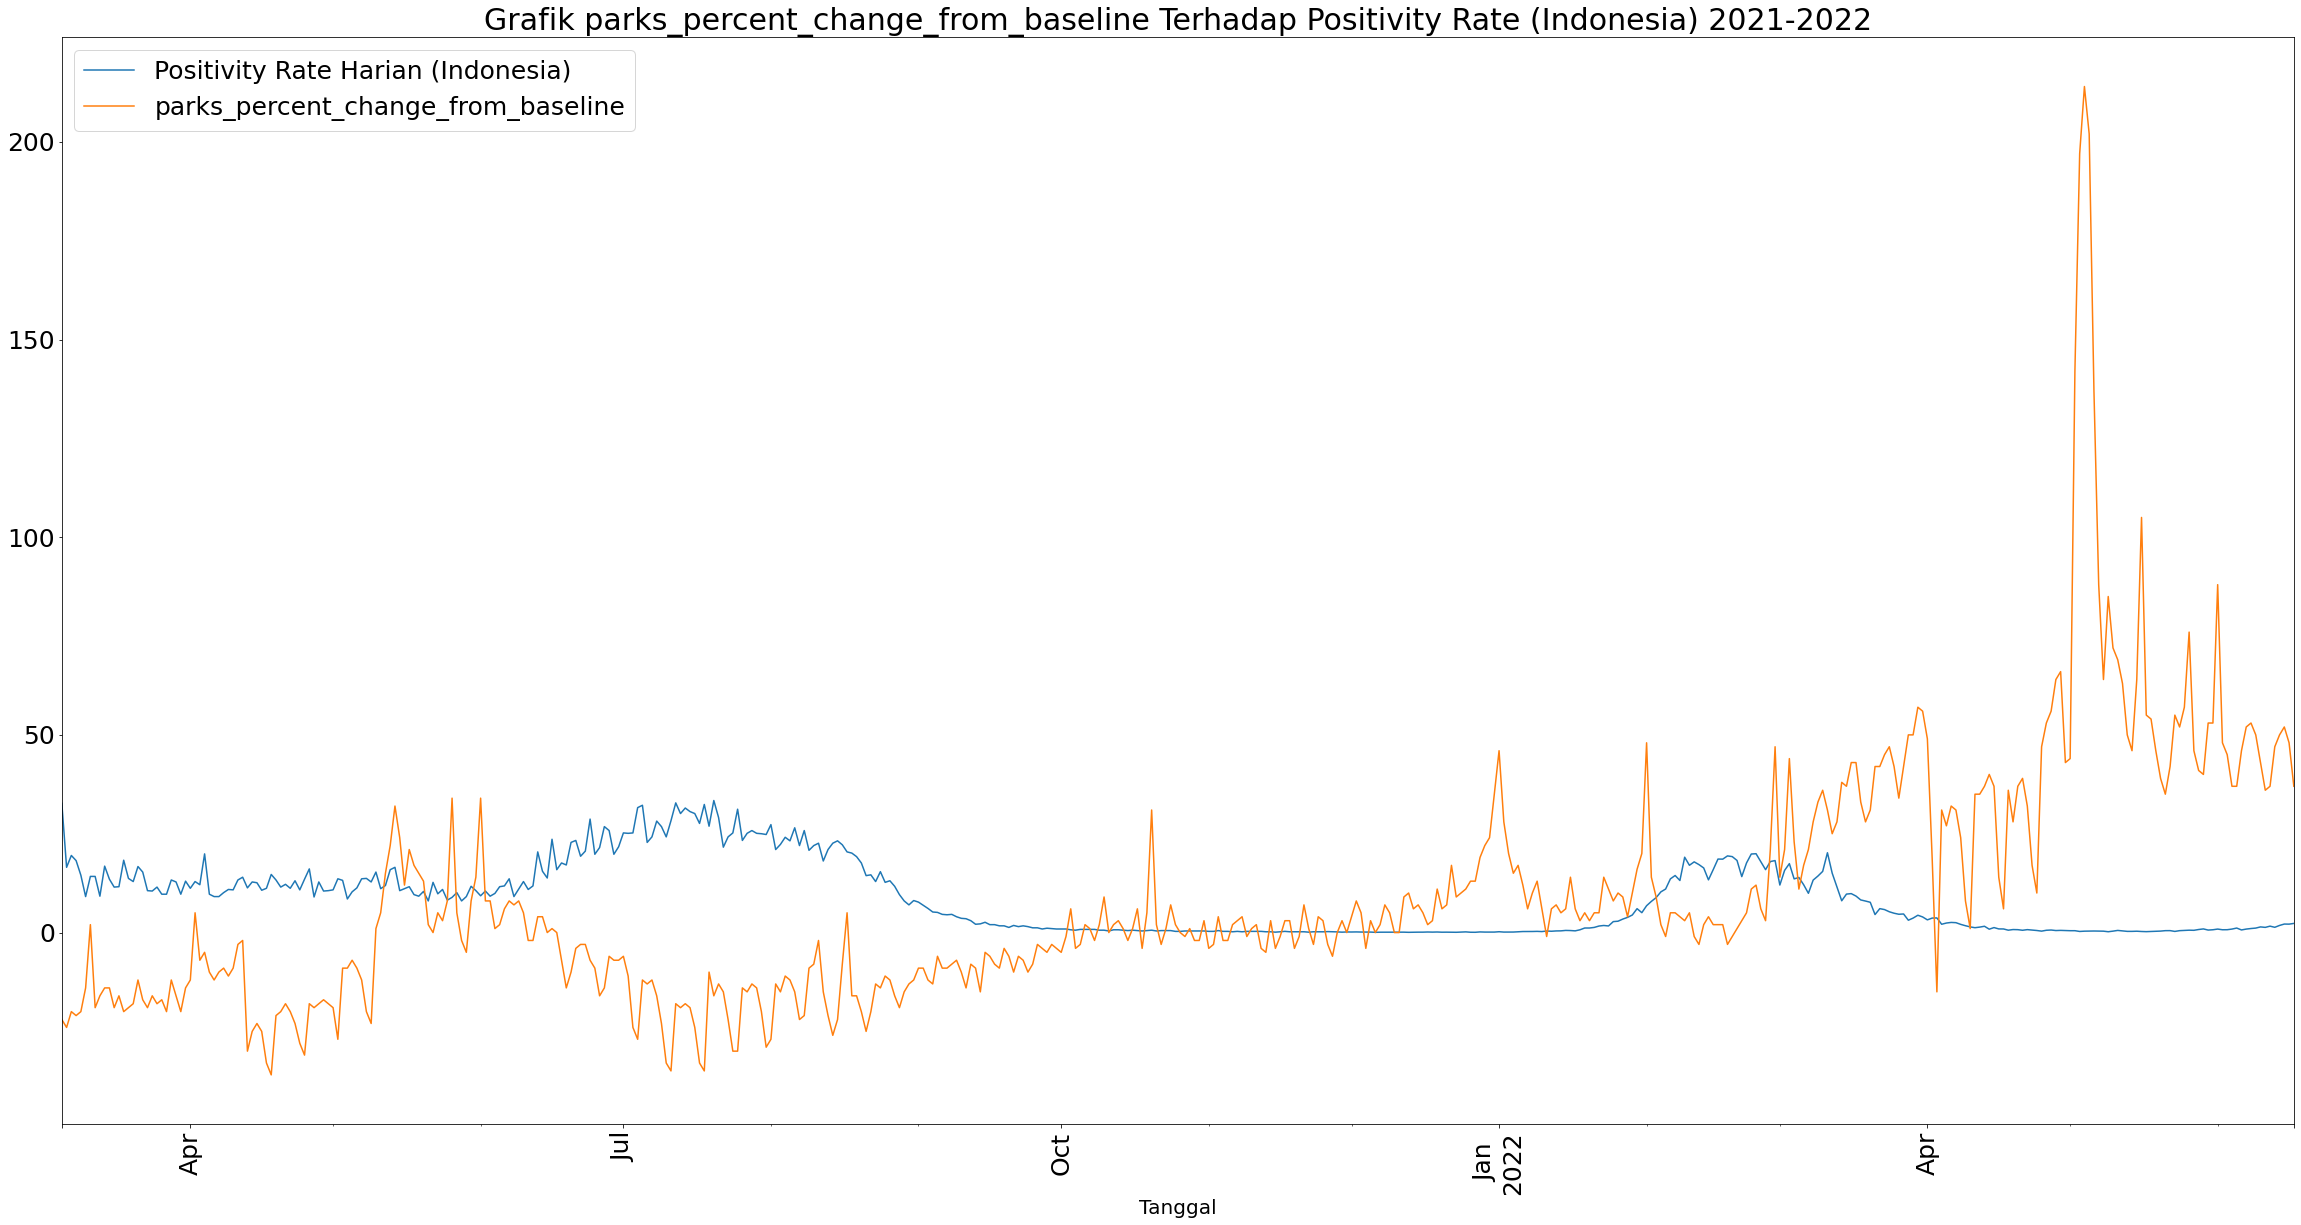

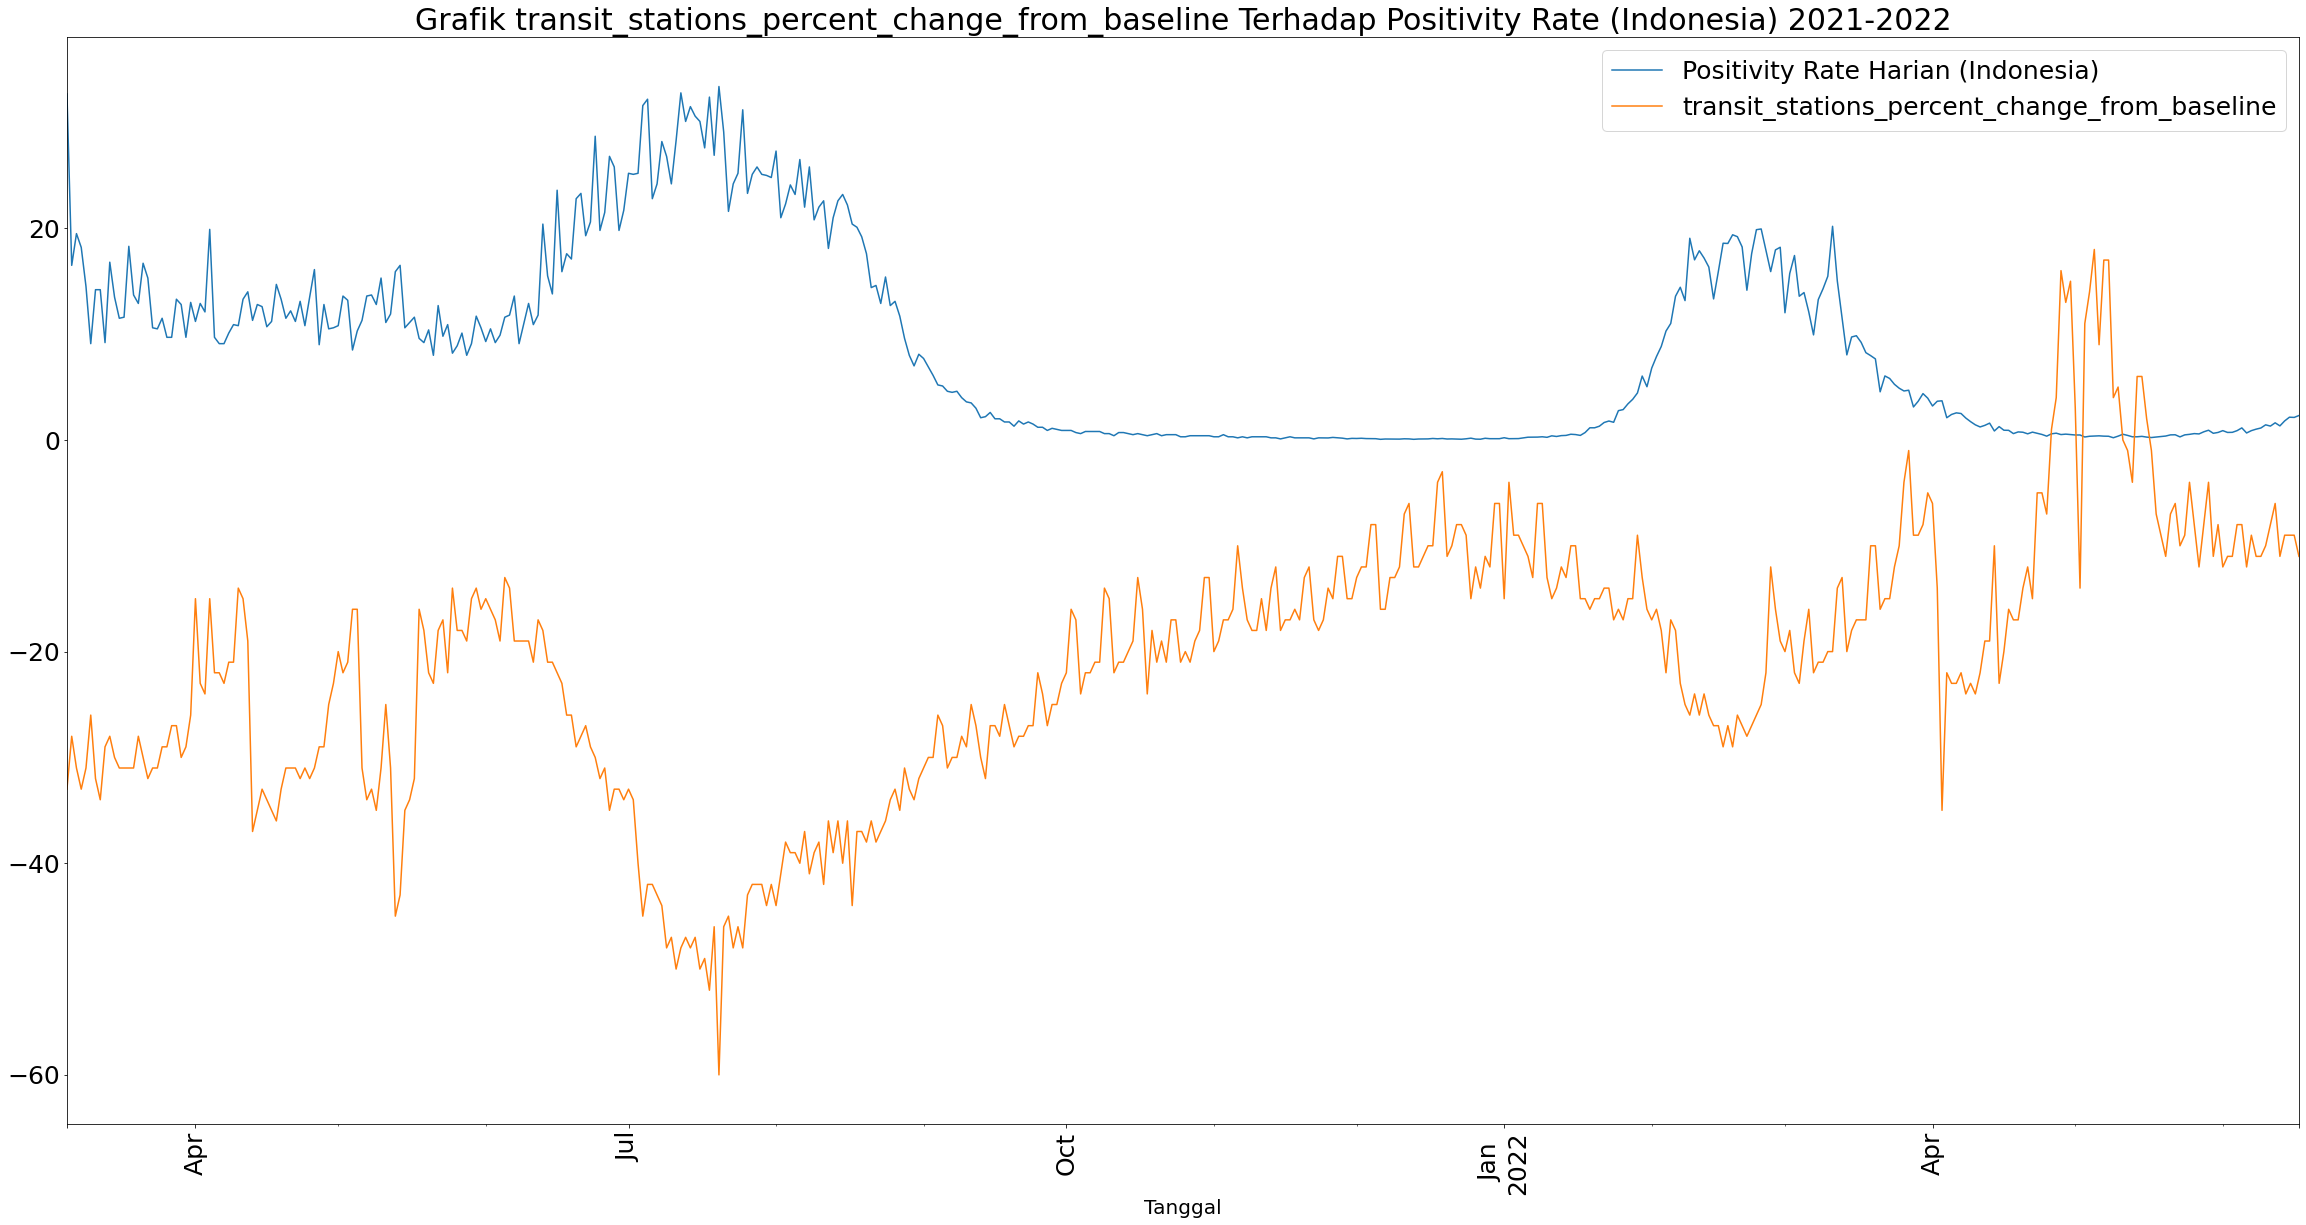

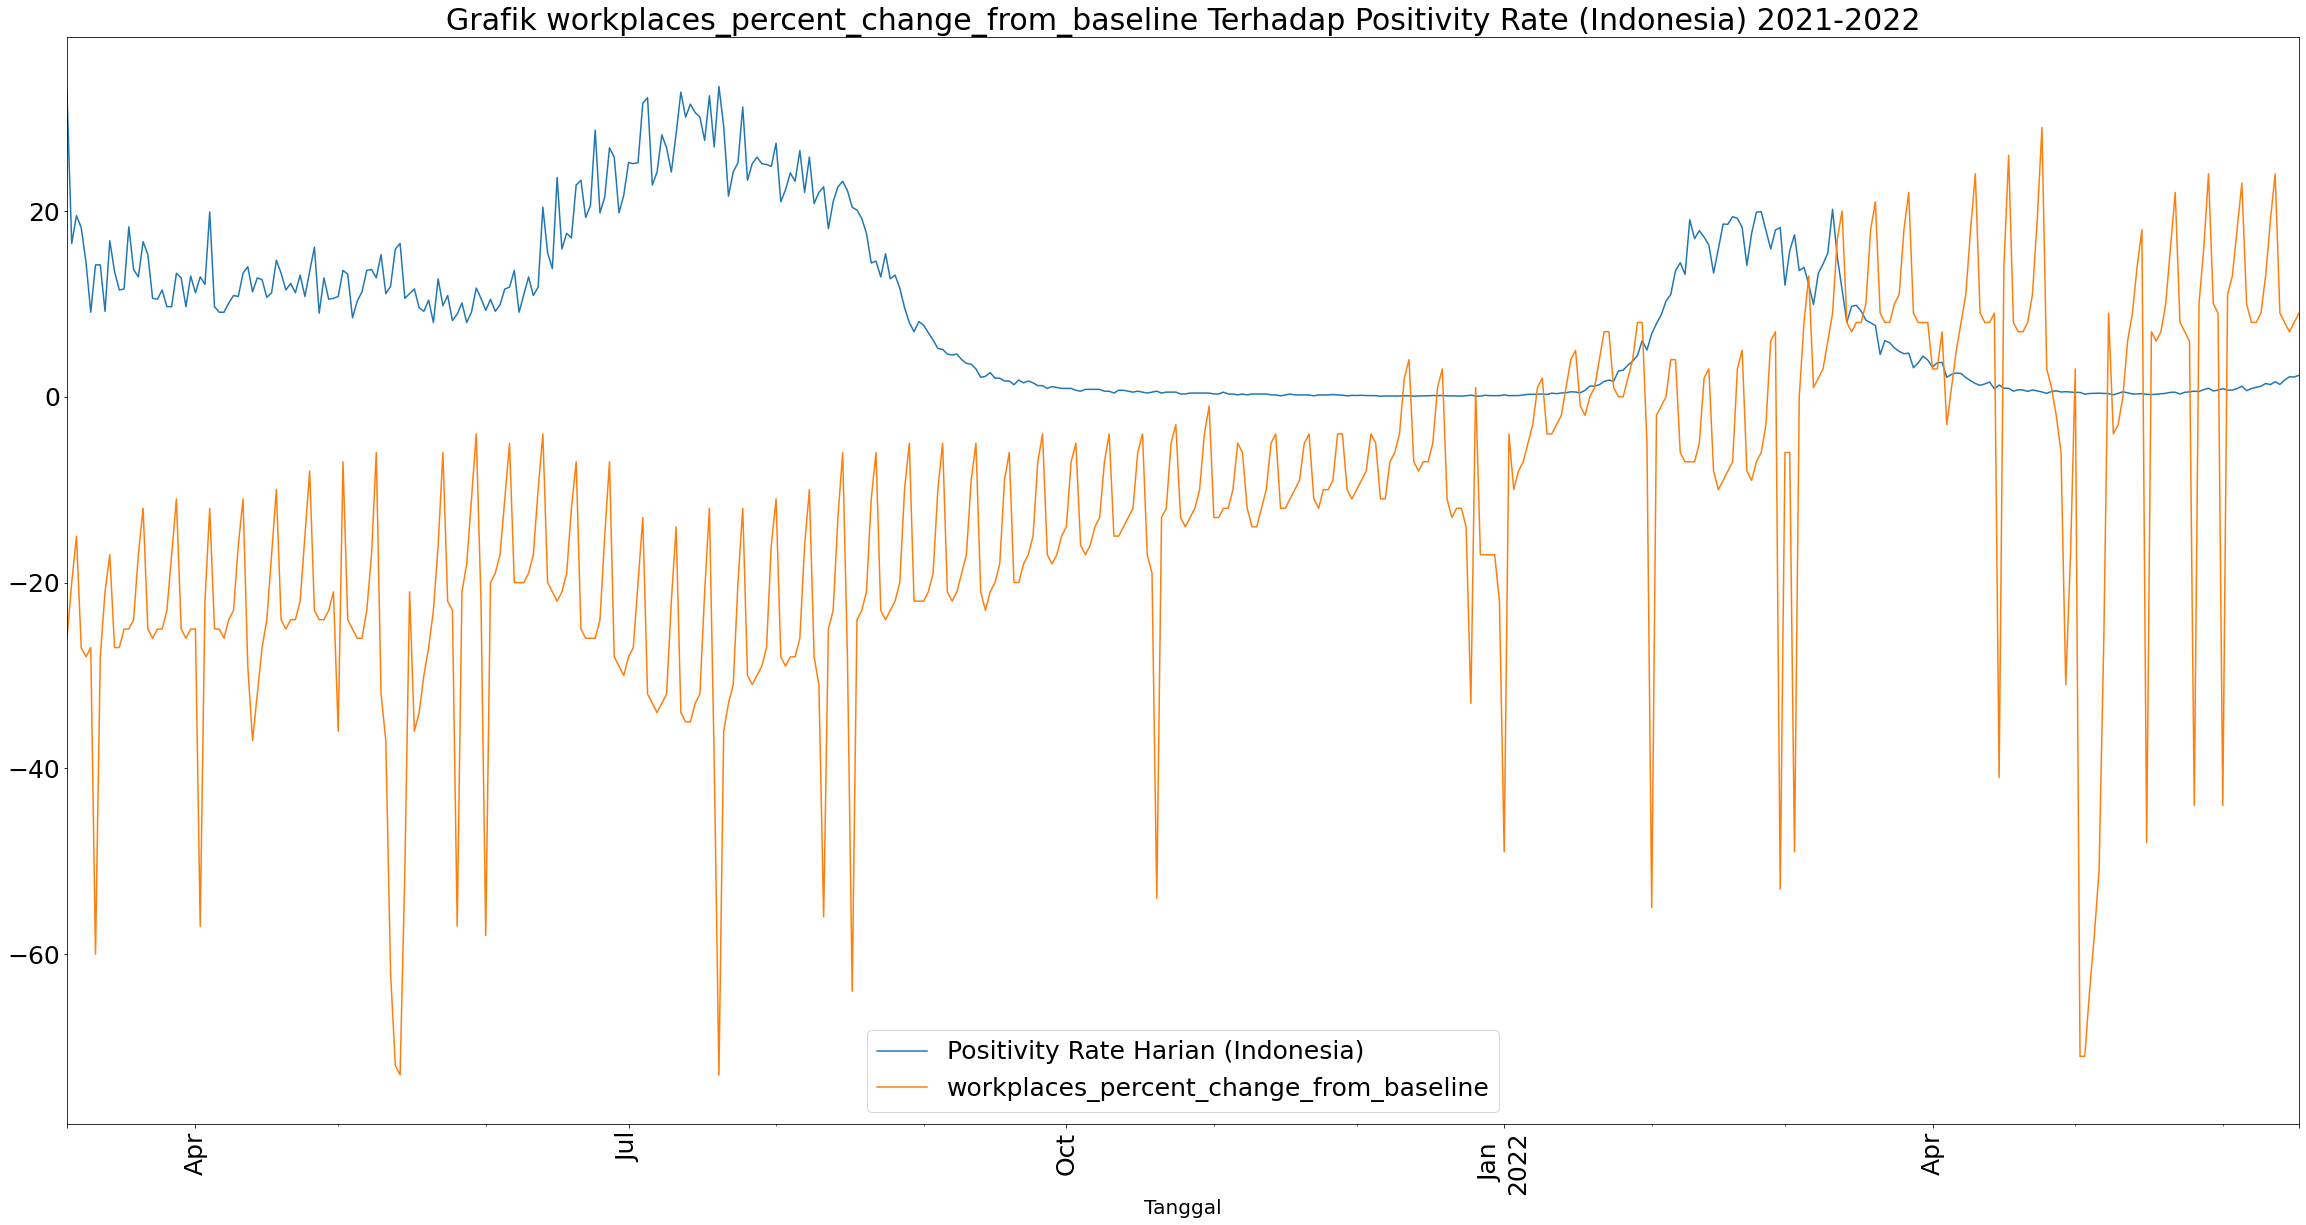

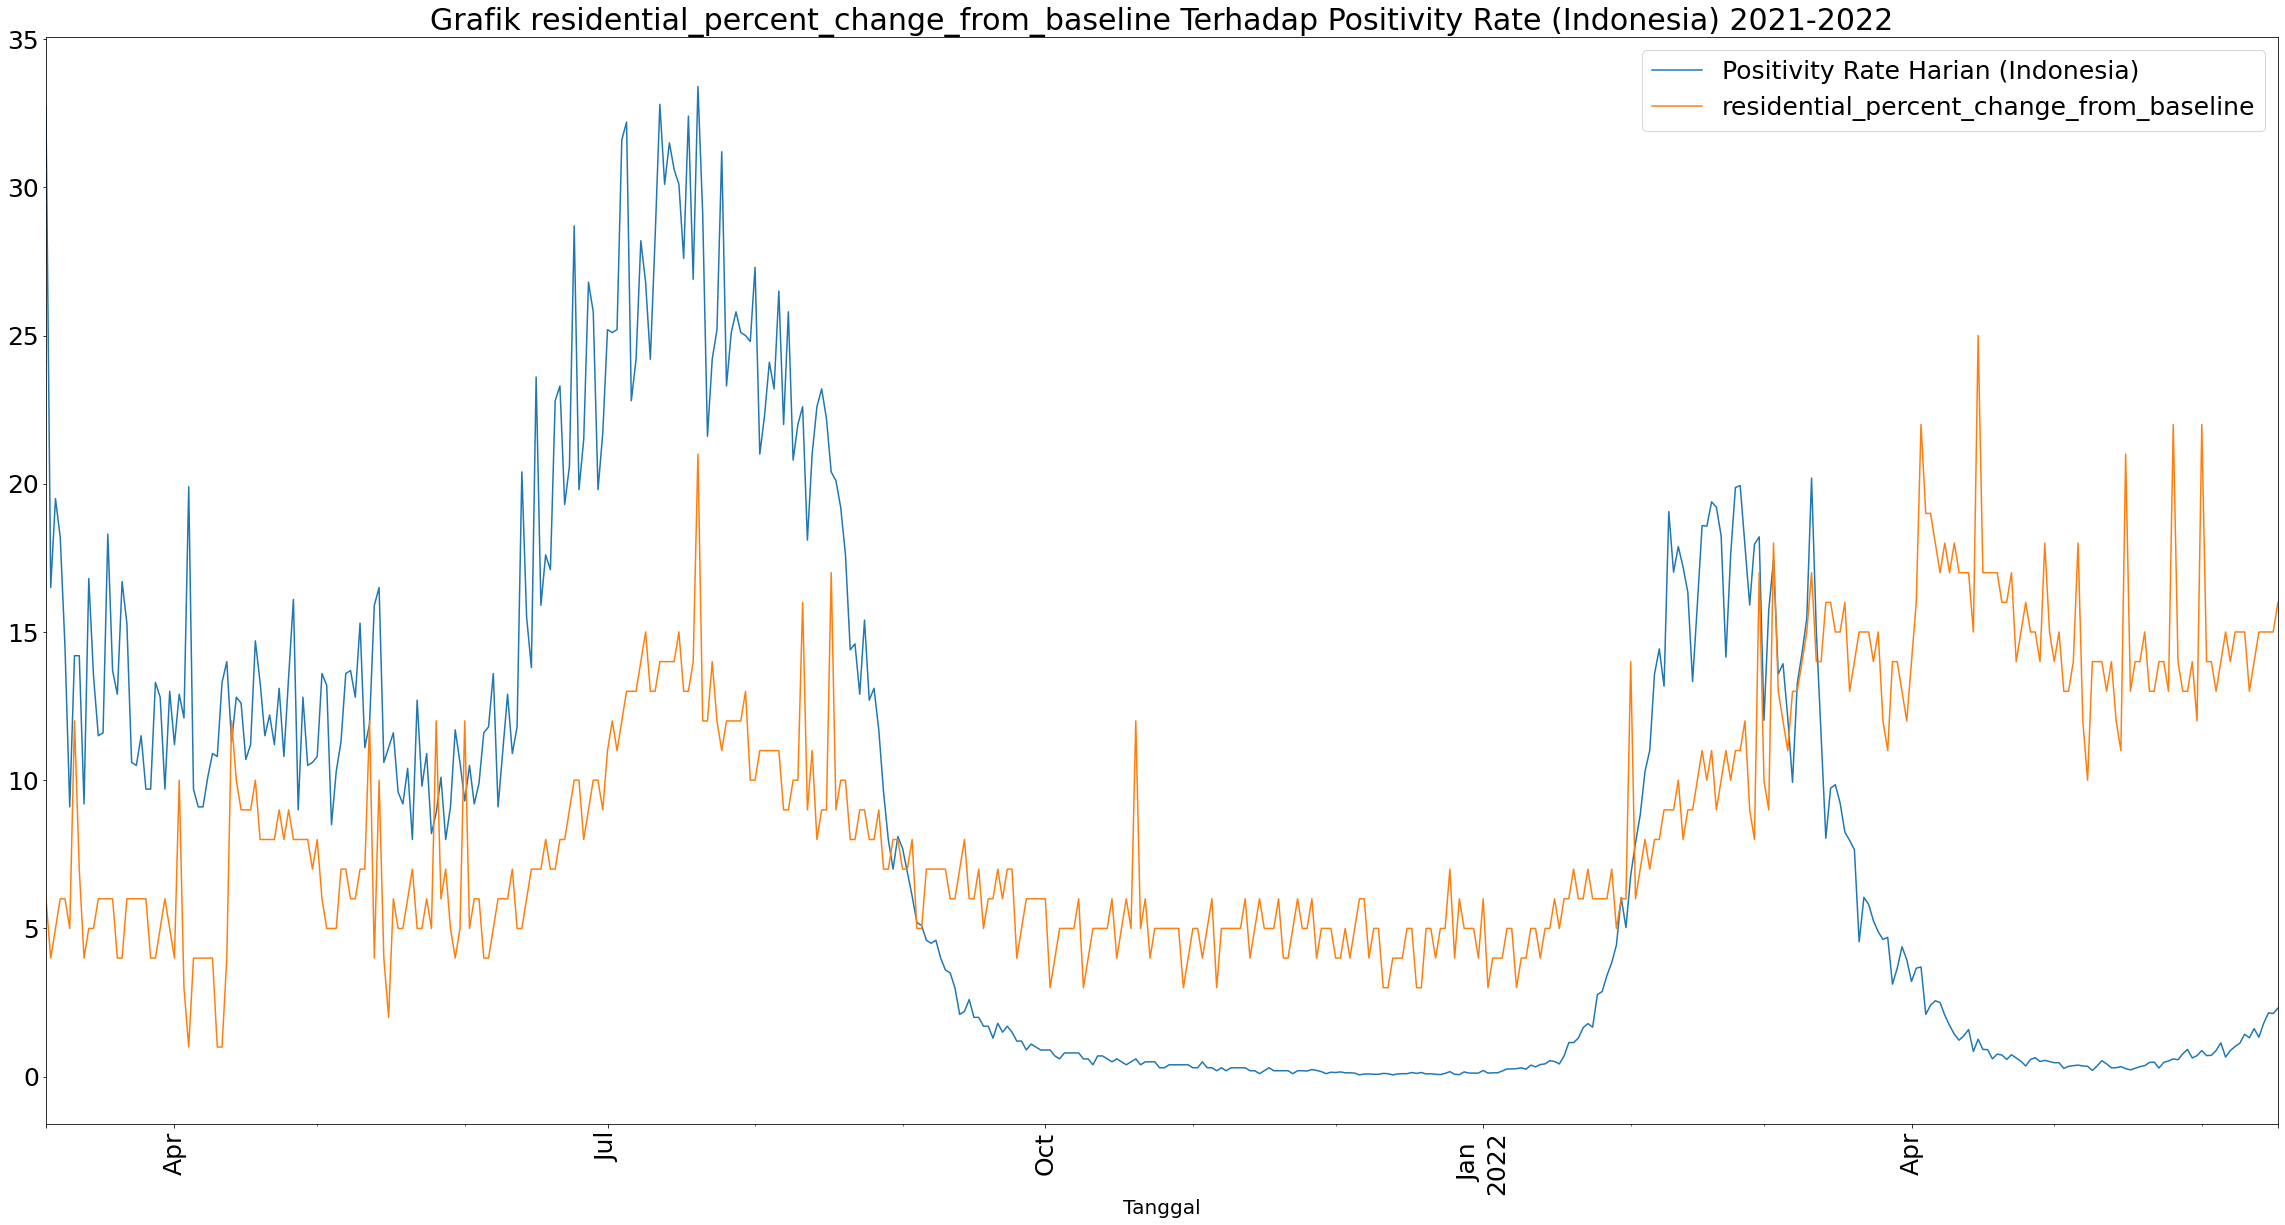

In [50]:
# Mobilitas terhadap Positivity Rate.
columns = ['retail_and_recreation_percent_change_from_baseline', 
           'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
           'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline', 
           'residential_percent_change_from_baseline'] 
for i in columns:
    covid19_df.plot(x = 'Tanggal', y = ['Positivity Rate Harian (Indonesia)', i],
             kind = 'line' , figsize = (40,20), fontsize = 25,  rot = 90)
    plt.legend(fontsize = 25)
    plt.title('Grafik {0} Terhadap Positivity Rate (Indonesia) 2021-2022'.format(i), fontsize = 30)
    plt.xlabel('Tanggal', fontsize = 20)
    plt.show()

**Hasil Interpretasi Visualisasi**

1. **Retail & Recreation** <br>
Dapat dilihat pada grafik bahwa tren mobilitas retail & recreation dengan tren positivity rate (Indonesia) **saling bertolak belakang**. Saat kasus positif meningkat, maka orang-orang akan lebih khawatir untuk keluar rumah yang dapat dilihat pada grafik yaitu saat grafik positivity rate meningkat, maka terjadi penurunan pada grafik mobilitas retail & recreation  begitu pula sebaliknya. Orang-orang berpergian ke tempat retail & recreation  dengan melihat kondisi menurunnya positivity rate. Namun, karena hal tersebut maka terjadi kontak secara langsung dengan orang lain sehingga di hari-hari selanjutnya memicu positivity rate untuk naik.

2. **Grocery & Pharmacy**<br>
Dapat dilihat pada grafik bahwa tren mobilitas grocery & pharmacy dengan tren positivity rate (Indonesia) **saling bertolak belakang**. Saat kasus positif meningkat, maka orang-orang akan lebih khawatir untuk keluar rumah yang dapat dilihat pada grafik yaitu saat grafik positivity rate meningkat, maka terjadi penurunan pada grafik mobilitas grocery & pharmacy begitu pula sebaliknya. 

3. **Parks** <br>
Terdapat beberapa titik pertengahan bulan Mei 2021 dan pertengahan oktober 2021 hingga januari 2022 dimana positivity rate (Indonesia) terlihat stabil tetapi trend parks terlihat berfluktuasi. Sehingga, kami mengindikasi bahwa positivity rate **tidak terpengaruh** oleh trend dari mobilitas parks.

4. **Transit Stations** <br>
Dapat dilihat pada grafik bahwa tren mobilitas transit stations dengan tren positivity rate (Indonesia) **saling bertolak belakang**. Saat kasus positif meningkat, maka orang-orang akan lebih khawatir untuk menggunakan transportasi umum yang dapat dilihat pada grafik yaitu saat grafik positivity rate meningkat, terjadi penurunan pada grafik mobilitas transit stations begitu pula sebaliknya.

5. **Workplaces** <br>
Dapat dilihat pada grafik bahwa tren mobilitas workplaces dengan tren positivity rate (Indonesia) **saling bertolak belakang**. Saat kasus positif meningkat, maka perusahaan-perusahaan memberi kebijakan kepada para karyawannya untuk work from yang dapat dilihat pada grafik yaitu saat grafik positivity rate meningkat, terjadi penurunan pada grafik mobilitas workplaces begitu pula sebaliknya. Grafik terkadang curam ke bawah karena hari libur kerja baik hari sabtu/minggu atau hari libur nasional.

6. **Residential** <br>
Dapat dilihat pada grafik bahwa tren mobilitas residential dengan tren positivity rate (Indonesia) **saling berbanding lurus**. Saat kasus positif meningkat, maka orang-orang akan lebih sering melakukan pergerakan di area pemukimannya karena khawatir untuk berpergian ke luar yang dapat dilihat pada grafik yaitu saat grafik positivity rate meningkat, maka grafik mobilitas residential juga meningkat begitu pula sebaliknya.

## ***Feature Selection*** : Pearson Correlation

In [51]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Untuk mengetahui variabel bebas (mobilitas) apa saja yang berkaitan erat dengan variabel target (positivity rate), akan dilakukan **feature selection** dengan menggunakan ***Pearson Correlation***.

In [52]:
MobPos_df = covid19_df[['retail_and_recreation_percent_change_from_baseline',
                        'grocery_and_pharmacy_percent_change_from_baseline',
                        'parks_percent_change_from_baseline',
                        'transit_stations_percent_change_from_baseline',
                        'workplaces_percent_change_from_baseline',
                        'residential_percent_change_from_baseline',
                        'Positivity Rate Harian (Indonesia)']]

Dilakukan seleksi fitur dengan Pearson Correlation,


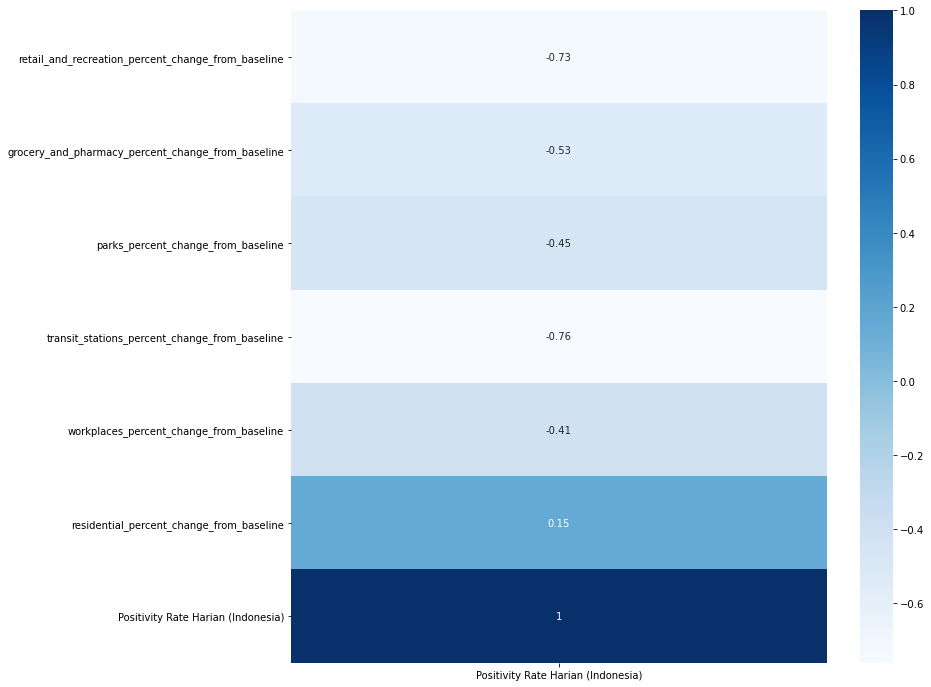

Didapat nilai absolut korelasi dengan variabel output adalah sebagai berikut: 
retail_and_recreation_percent_change_from_baseline    0.727949
grocery_and_pharmacy_percent_change_from_baseline     0.530539
parks_percent_change_from_baseline                    0.454783
transit_stations_percent_change_from_baseline         0.760307
workplaces_percent_change_from_baseline               0.405207
residential_percent_change_from_baseline              0.151998
Name: Positivity Rate Harian (Indonesia), dtype: float64


Mean dari korelasi seluruh variabel terhadap variabel target adalah 0.5051303787277697


Hasil feature selection adalah: 
retail_and_recreation_percent_change_from_baseline    0.727949
grocery_and_pharmacy_percent_change_from_baseline     0.530539
transit_stations_percent_change_from_baseline         0.760307
Name: Positivity Rate Harian (Indonesia), dtype: float64


In [53]:
print('Dilakukan seleksi fitur dengan Pearson Correlation,')
plt.figure(figsize = (12,12))
cor = MobPos_df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('Didapat nilai absolut korelasi dengan variabel output adalah sebagai berikut: ')
print(abs(cor['Positivity Rate Harian (Indonesia)'][0:-1]))
cor['Positivity Rate Harian (Indonesia)'] = cor['Positivity Rate Harian (Indonesia)'][0:-1]
margin = abs(cor['Positivity Rate Harian (Indonesia)'][0:-1]).mean()

print('\n')

print('Mean dari korelasi seluruh variabel terhadap variabel target adalah {0}'.format(margin))

print('\n')

print('Hasil feature selection adalah: ')
fs = abs(cor['Positivity Rate Harian (Indonesia)'][0:-1])[abs(cor['Positivity Rate Harian (Indonesia)']) > margin]
print(fs)

Dari hasil feature selection, didapatkan variabel mobilitas yang paling berpengaruh (**tolak ukurnya adalah variabel dengan korelasi lebih besar daripada rata-rata korelasi yang ada**) adalah 
retail_and_recreation_percent_change_from_baseline, grocery_and_pharmacy_percent_change_from_baseline, dan transit_stations_percent_change_from_baseline.

## **Modelling** Analisis

Akan dibuat **model regresi multivariat** untuk menghasilkan persamaan regresi yang mampu meneliti hubungan lebih dari dua variabel.

**Variabel X (variabel bebas)** berisikan data mobilitas (hasil *feature selection*)

**Variabel Y (variabel terikat)** berisikan data *positivity rate*

Akan dilakukan pembagian **dataset menjadi train dan test** dengan perbandingan 8:2

In [54]:
cdf = MobPos_df
msk = np.random.rand(len(MobPos_df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Pengolahan data train**



In [55]:
X_train = np.asanyarray(train[['retail_and_recreation_percent_change_from_baseline', 
                               'grocery_and_pharmacy_percent_change_from_baseline', 
                               'transit_stations_percent_change_from_baseline']])
y_train = np.asanyarray(train[['Positivity Rate Harian (Indonesia)']])

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: ', regr.coef_)
print('y-Intercept: ', regr.intercept_)

Coefficients:  [[-0.69171079  0.50203938 -0.29877498]]
y-Intercept:  [-9.34189604]


Didapatkan **koefisien** untuk ketiga variabel x dan **intercept** untuk persamaan regresi

Terbentuk suatu persamaan regresi sebagai berikut
$$y= -0.70471722 x_{1} + 0.52829018  x_{2} - 0.29635462 x_{3} - 9.7258368 $$

Keterangan: <br>
1. $x_{1}$=Mobilitas pada tempat retail dan rekreasi
2. $x_{2}$=Mobilitas pada tempat toko bahan makanan dan apotek 
3. $x_{3}$=Mobilitas pada tempat pusat transportasi umum
4. $y$=Positivity rate

*Catatan*: setiap pengulangan execute syntax dapat mengubah koefisien dan intercept dikarenakan pada pembagian variabel train dan test sifatnya random (berbeda tiap pengulangan).

Dilakukan evaluasi model dengan menggunakan **data test**

In [56]:
X_test = np.asanyarray(test[['retail_and_recreation_percent_change_from_baseline', 
                             'grocery_and_pharmacy_percent_change_from_baseline', 
                             'transit_stations_percent_change_from_baseline']])
y_test = np.asanyarray(test[['Positivity Rate Harian (Indonesia)']])

y_prob = regr.predict(test[['retail_and_recreation_percent_change_from_baseline', 
                            'grocery_and_pharmacy_percent_change_from_baseline', 
                            'transit_stations_percent_change_from_baseline']])

print("Variance score: %.2f" % regr.score(X_test, y_test))

Variance score: 0.75


Didapatkan **variance score sebesar 0.66**.
Variance score harus berada di atas 0.55 dan di bawah 1. Sehingga, diperoleh variance score untuk model regresi tersebut baik dan **model dapat digunakan**.

## **Conclusion**

Dari pengolahan data di atas, diperoleh dari sekian banyak mobilitas, berdasarkan feature selection, hanya diperoleh beberapa faktor mobilitas yang berpengaruh terhadap positivity rate covid 19 yaitu mobilitas pada tempat retail dan rekreasi, mobilitas pada tempat toko bahan makanan dan apotek,dan mobilitas pada tempat pusat transportasi umum. Kemudian, dibuat model yang merepresentasikan pengaruh feature mobilitas dengan positivity rate dalam bentuk persamaan regresi multivariat sebagai berikut
$$y= -0.70471722 x_{1} + 0.52829018  x_{2} - 0.29635462 x_{3} - 9.7258368 $$

Keterangan: <br>
1. $x_{1}$=Mobilitas pada tempat retail dan rekreasi
2. $x_{2}$=Mobilitas pada tempat toko bahan makanan dan apotek 
3. $x_{3}$=Mobilitas pada tempat pusat transportasi umum
4. $y$=Positivity Rate

Dengan mensubstitusi nilai mobilitas-mobilitas tersebut, dapat **diprediksi perkiraan positivity rate** di Indonesia.

Berdasarkan evaluasi didapatkan **model tidak sempurna** yang kemungkinan karena ada variabel lain diluarnya seperti **vaksin** (dapat dilihat pada visualisasi di bawah bahwa persentasi vaksin dosis 2 semakin meningkat tidak bergantung pada positivity rate harian Indonesia).


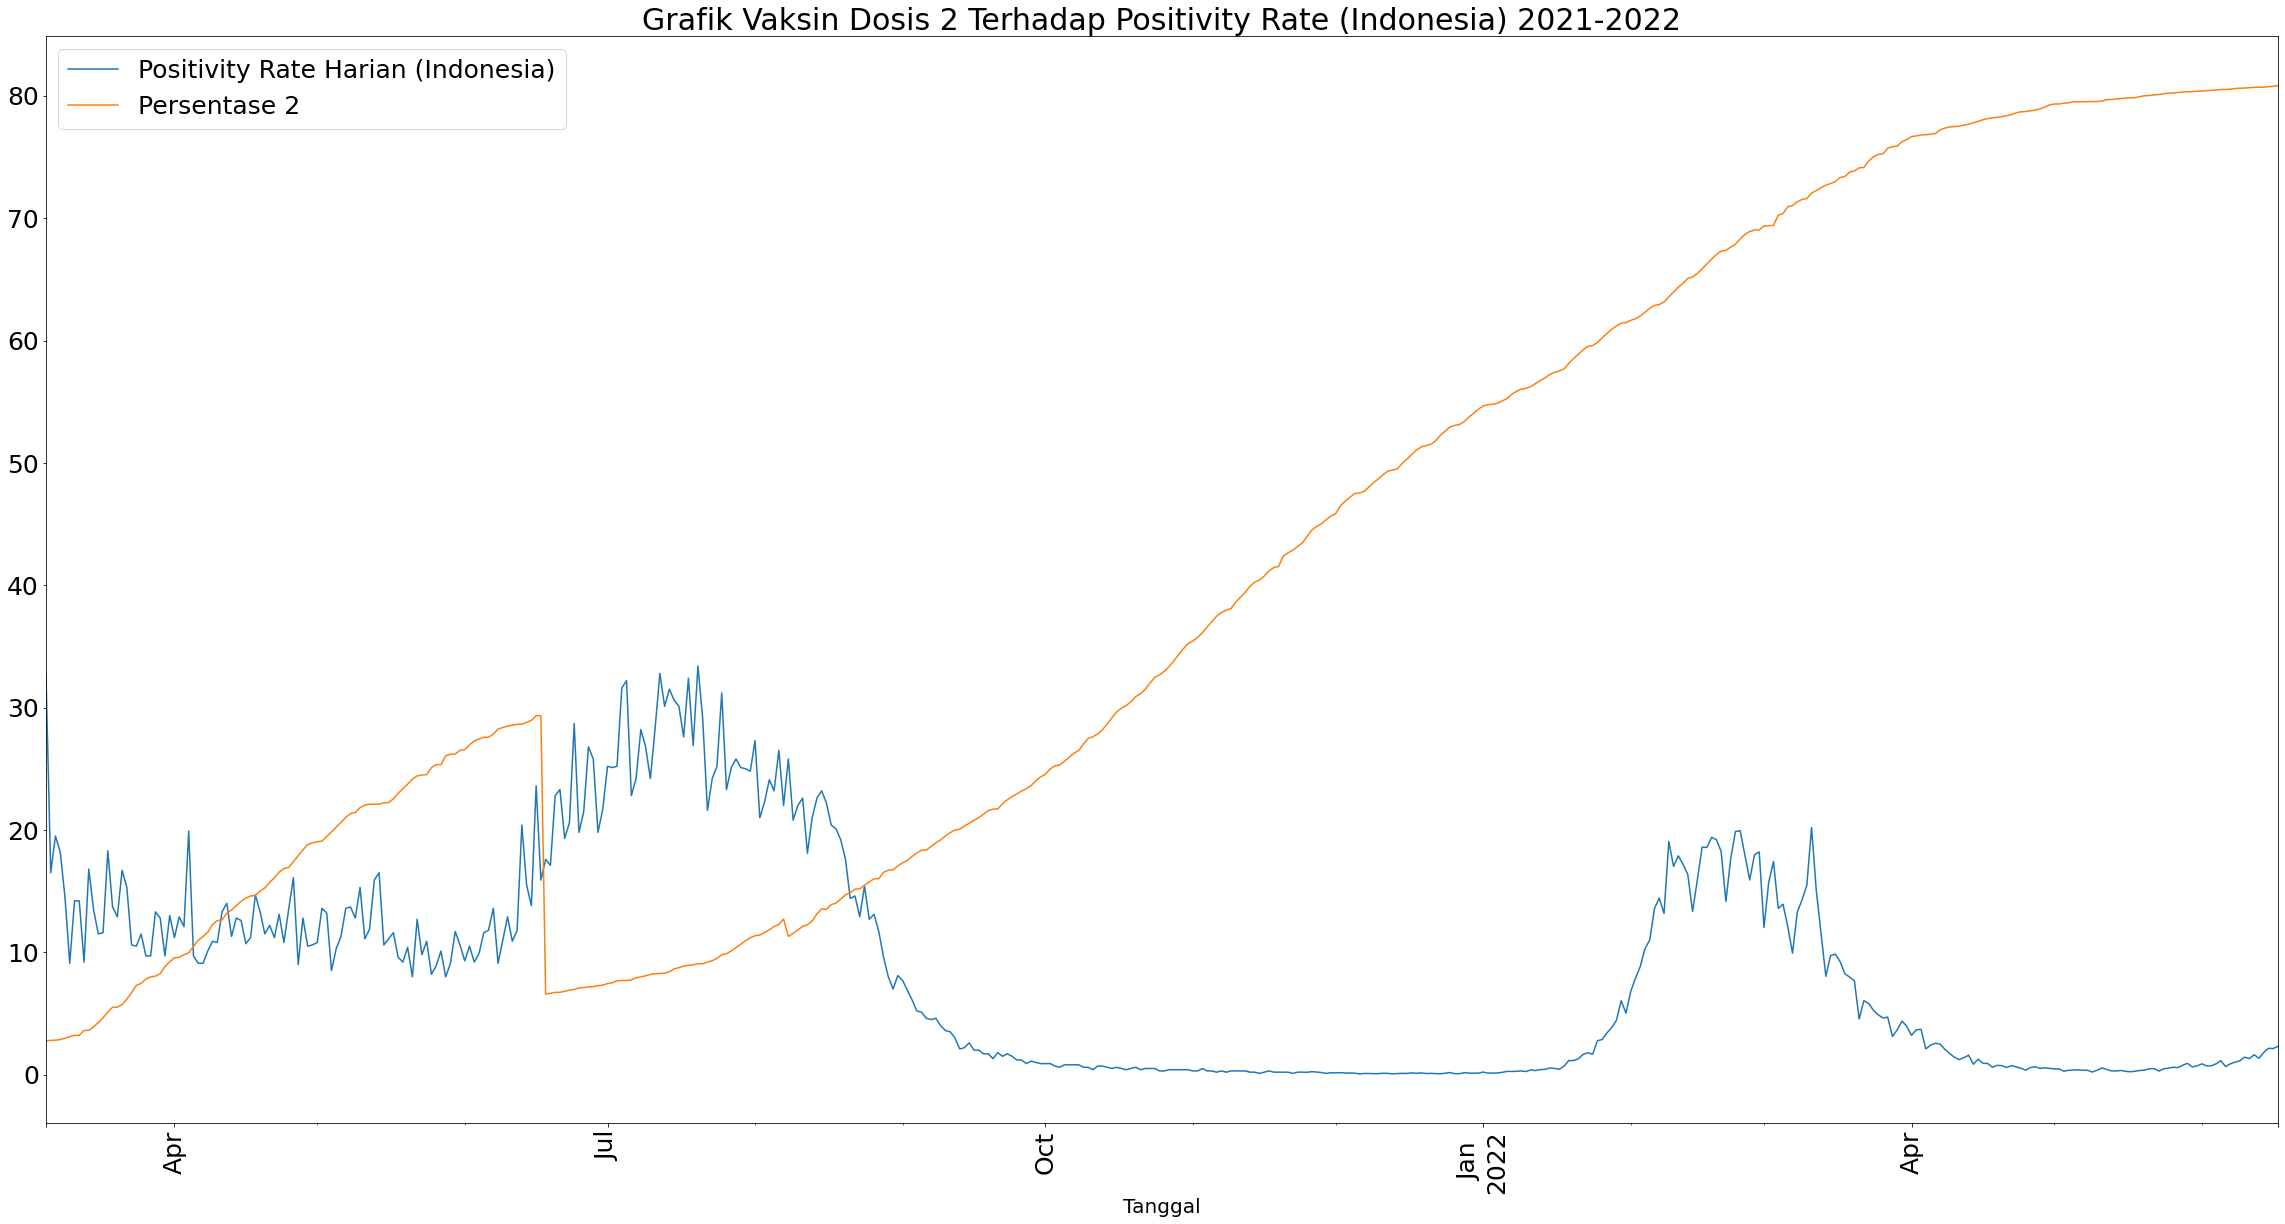

In [57]:
covid19_df.plot(x = 'Tanggal', y = ['Positivity Rate Harian (Indonesia)', 'Persentase 2'],
                kind = 'line' , figsize = (40,20), fontsize = 25,  rot = 90)
plt.legend(fontsize = 25)
plt.title('Grafik Vaksin Dosis 2 Terhadap Positivity Rate (Indonesia) 2021-2022', fontsize = 30)
plt.xlabel('Tanggal', fontsize = 20)
plt.show()

Namun, tetap dapat dipastikan bahwa **mobilitas-mobilitas** pada retail dan rekreasi, tempat toko bahan makanan dan apotek, tempat transportasi umum **memengaruhi trend dari *positivity rate* COVID-19**.

## Daftar Pustaka


1. Daily Update Agregat COVID-19 Jakarta-Indonesia. https://tiny.cc/Datacovidjakarta <br>
2. Satuan Tugas Penanganan COVID-19. (n.d.) Data Perkembangan COVID-19 Indonesia. https://covid19.go.id <br>
3. Google. (2022, May 20). *COVID-19 Community Mobility Reports*. https://www.google.com/covid19/mobility <br>